In [235]:
import pandas as pd
import seaborn as sns
from pdc_project import plot
from matplotlib import pyplot as plt
import numpy as np

In [236]:
coolingflow_biotemp = pd.read_excel("20230207_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("20230207_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("20230207_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("20230207_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))

Step     0.000e+00 ± 1.423e+01
Kp      -1.467e-03 ± 3.901e-05
Tau      6.396e+00 ± 1.104e-03
Td       1.853e-03 ± 5.703e-05
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      7.968e-04 ± 2.649e-05
Tau     1.776e+01 ± 2.838e-02
Td      8.098e+00 ± 9.755e-03
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      4.175e-05 ± 1.547e-06
Tau     1.843e+01 ± 3.244e-01
Td      5.852e+00 ± 5.798e-02
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      2.811e-04 ± 1.039e-05
Tau     2.683e+01 ± 4.872e-01
Td      3.144e+00 ± 5.694e-02
dtype: object

In [237]:
coolingflow_biotemp = pd.read_excel("20230209_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("20230209_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("20230209_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("20230209_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))

Step     0.000e+00 ± 1.423e+01
Kp      -1.649e-03 ± 4.646e-05
Tau      6.390e+00 ± 1.395e-03
Td       1.963e-03 ± 6.241e-05
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      9.210e-04 ± 3.280e-05
Tau     1.773e+01 ± 4.712e-02
Td      8.137e+00 ± 1.060e-02
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      2.120e-04 ± 1.882e-05
Tau     1.927e+01 ± 8.299e-01
Td      5.973e+00 ± 1.313e-01
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      1.425e-03 ± 1.259e-04
Tau     2.803e+01 ± 1.220e+00
Td      3.277e+00 ± 1.312e-01
dtype: object

In [238]:
def summary(df, title = "", relative = False):
    df = df.copy()
    vals = ["Kp", "Tau", "Td"]
    if relative:
        df[vals]= df[vals]/df[vals].mean().abs()
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(10,3)
    mean = df.mean()
    sem = df.sem()
    std = df.std()
    for i in range(3):
        val = vals[i]
        sns.lineplot(df, x = "Step", y = val, ax = ax[i])
        ax[i].set_title(title)
        ax[i].axhspan(mean[val]-sem[val], mean[val]+sem[val], alpha=0.2)
        ax[i].axhspan(mean[val]-std[val], mean[val]+std[val], alpha=0.2)
        ax[i].set_xlabel("Step/%")
        if relative and mean[val] > 0:
            ax[i].set_ylim([0,2])
        elif relative and mean[val] < 0: 
                ax[i].set_ylim([-2,0])
    return fig, ax

In [239]:
coolingflow_biotemp.sem()

Step    14.234872
Kp       0.000046
Tau      0.001395
Td       0.000062
dtype: float64

(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Kp'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Tau'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Td'>],
       dtype=object))

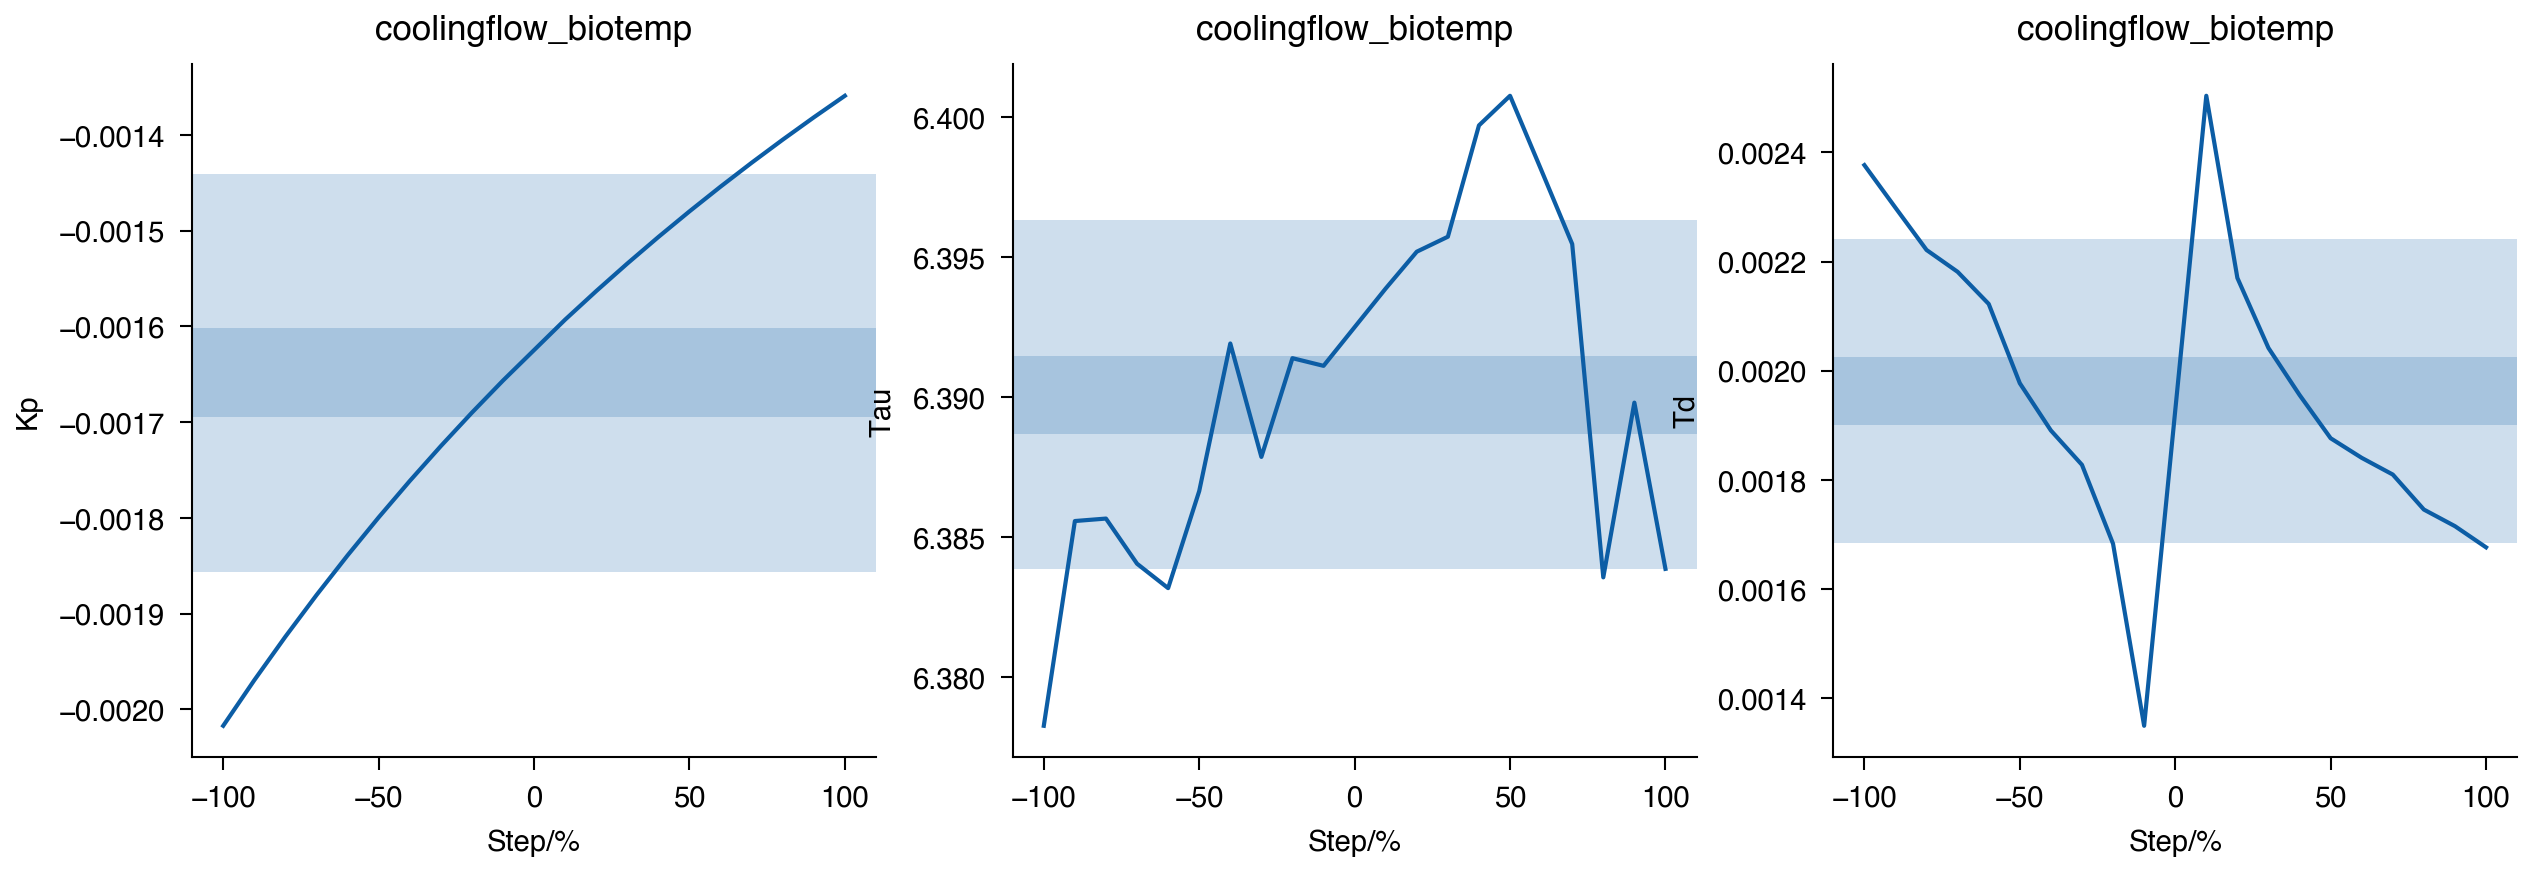

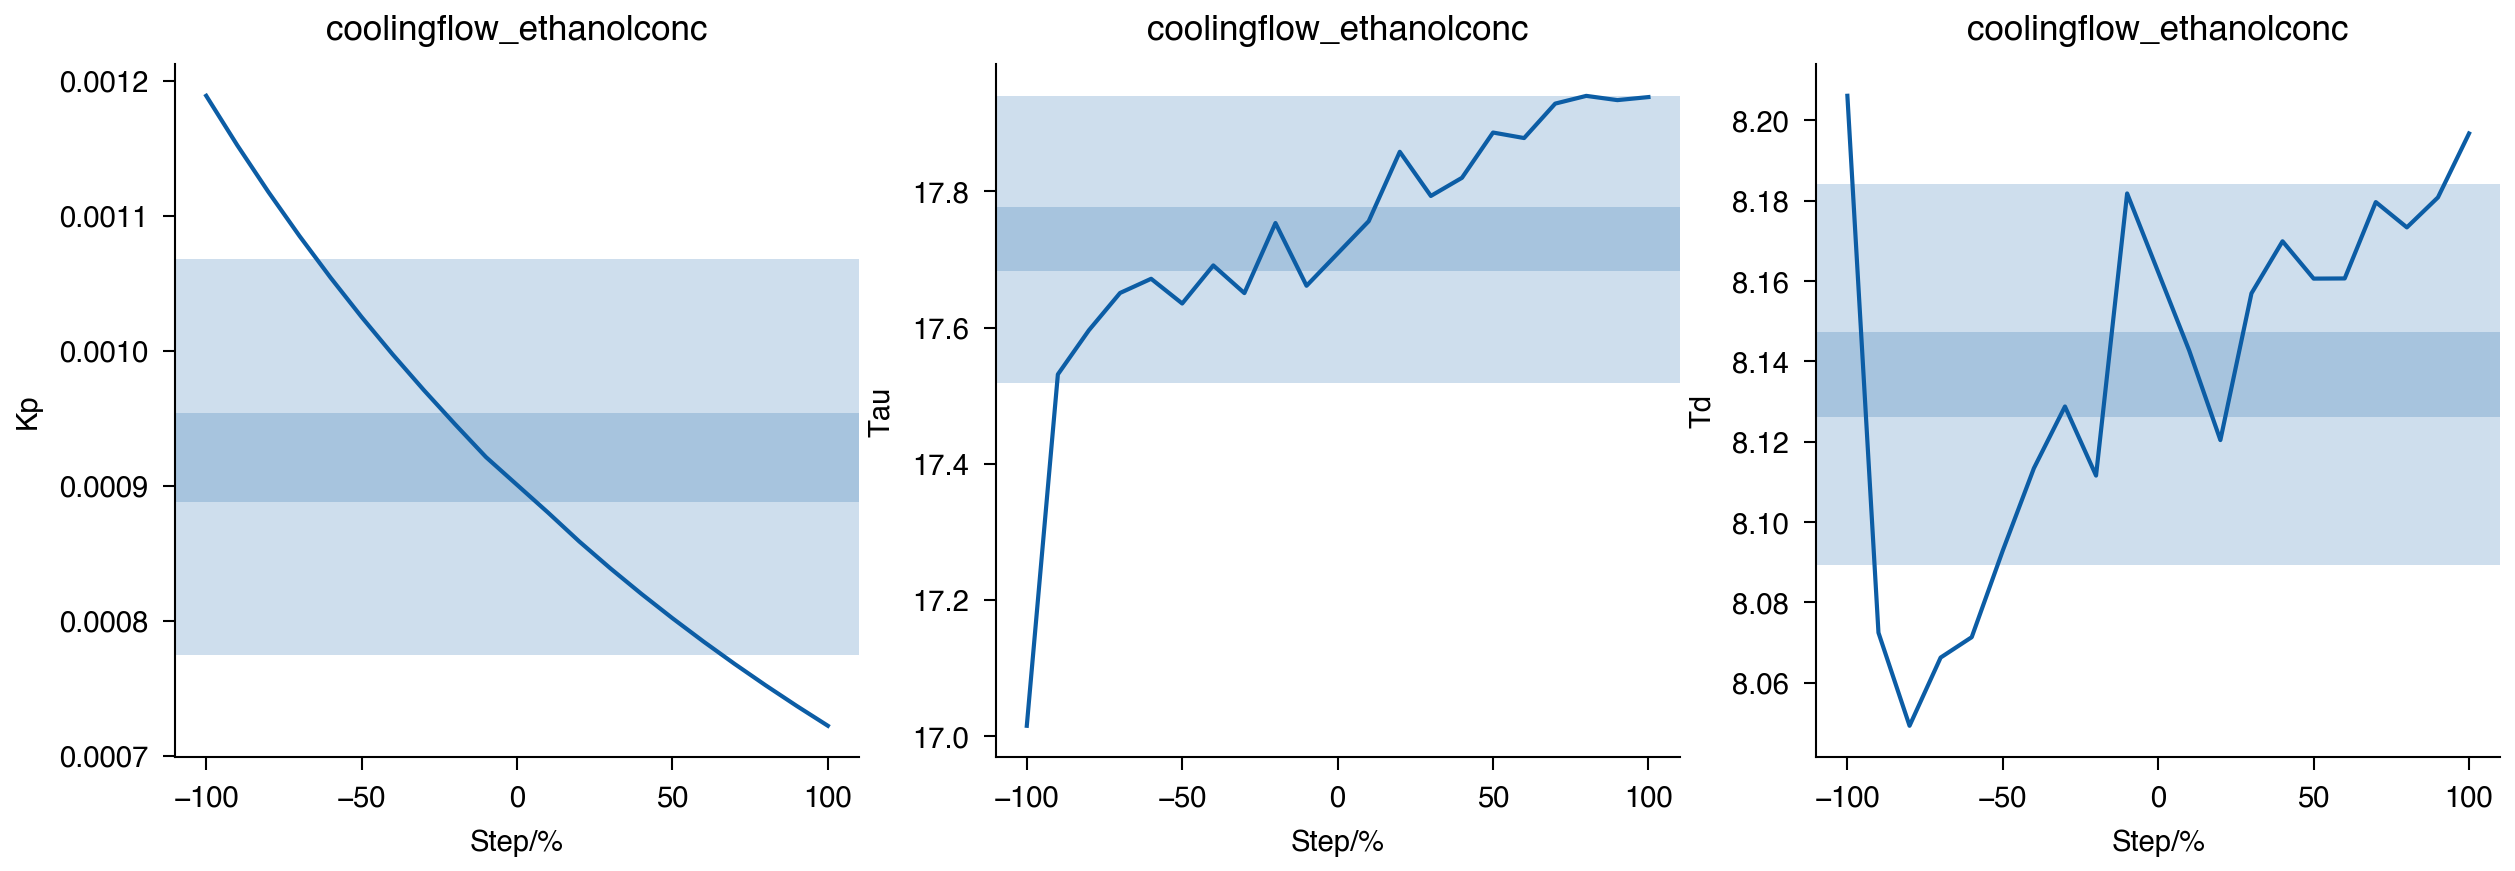

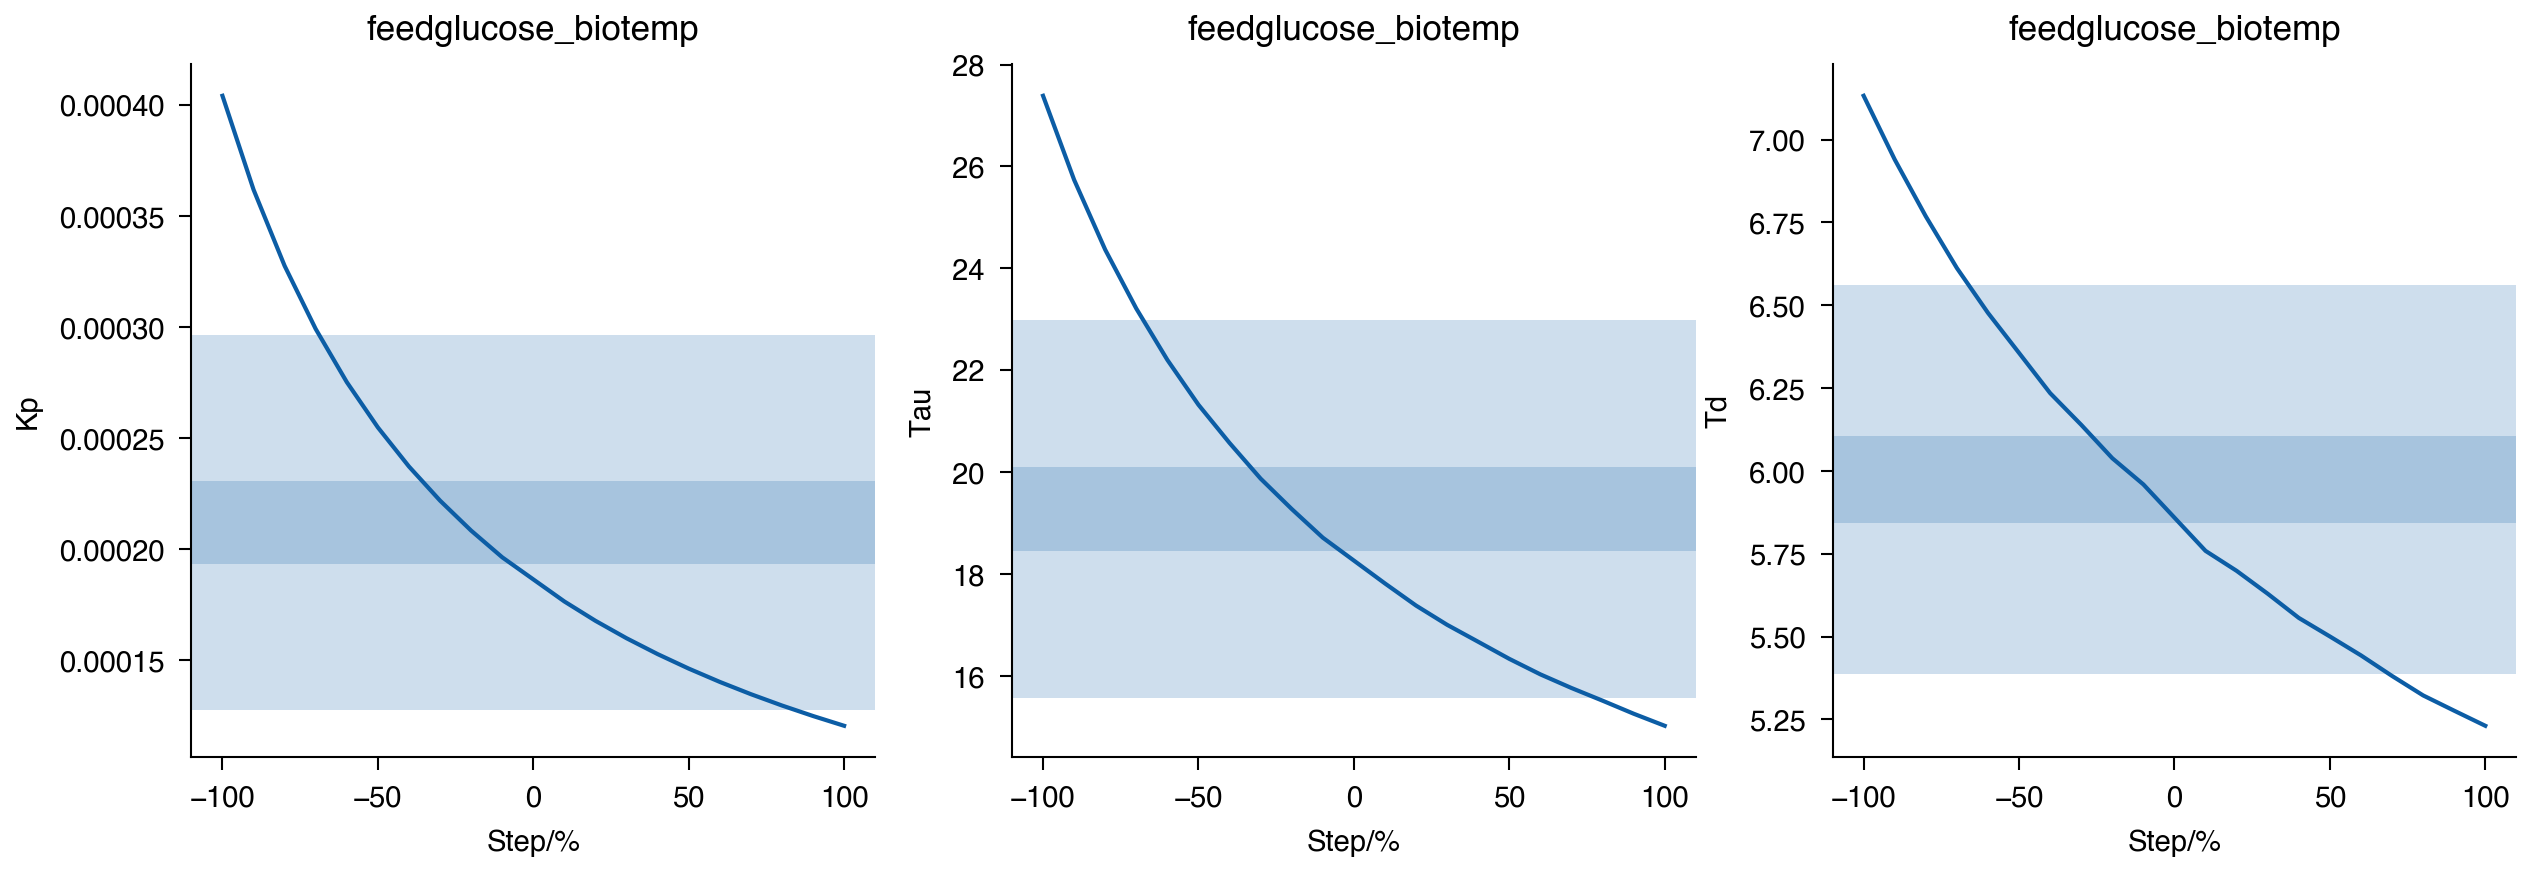

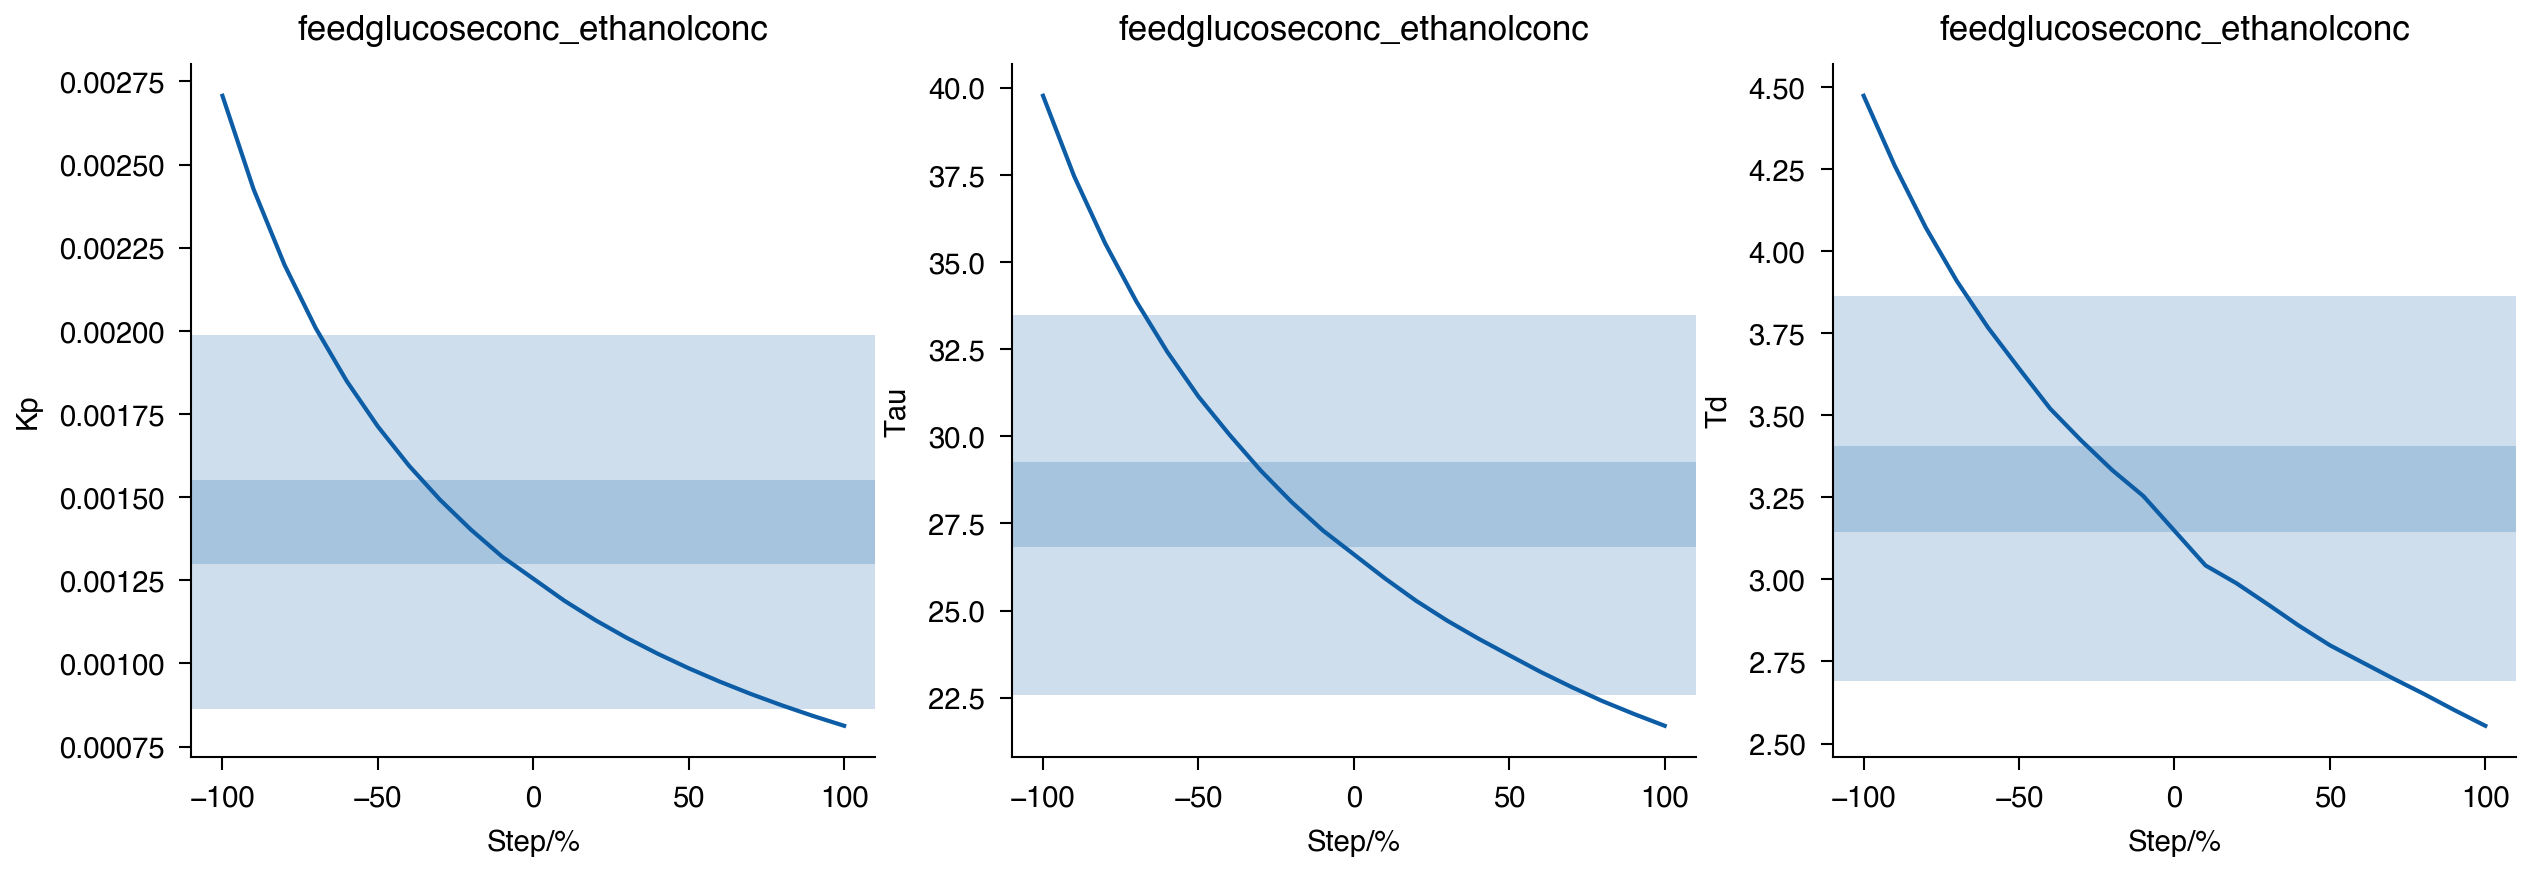

In [240]:
summary(coolingflow_biotemp, "coolingflow_biotemp")
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc")
summary(feedglucose_biotemp, "feedglucose_biotemp")
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc")



(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Kp'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Tau'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Td'>],
       dtype=object))

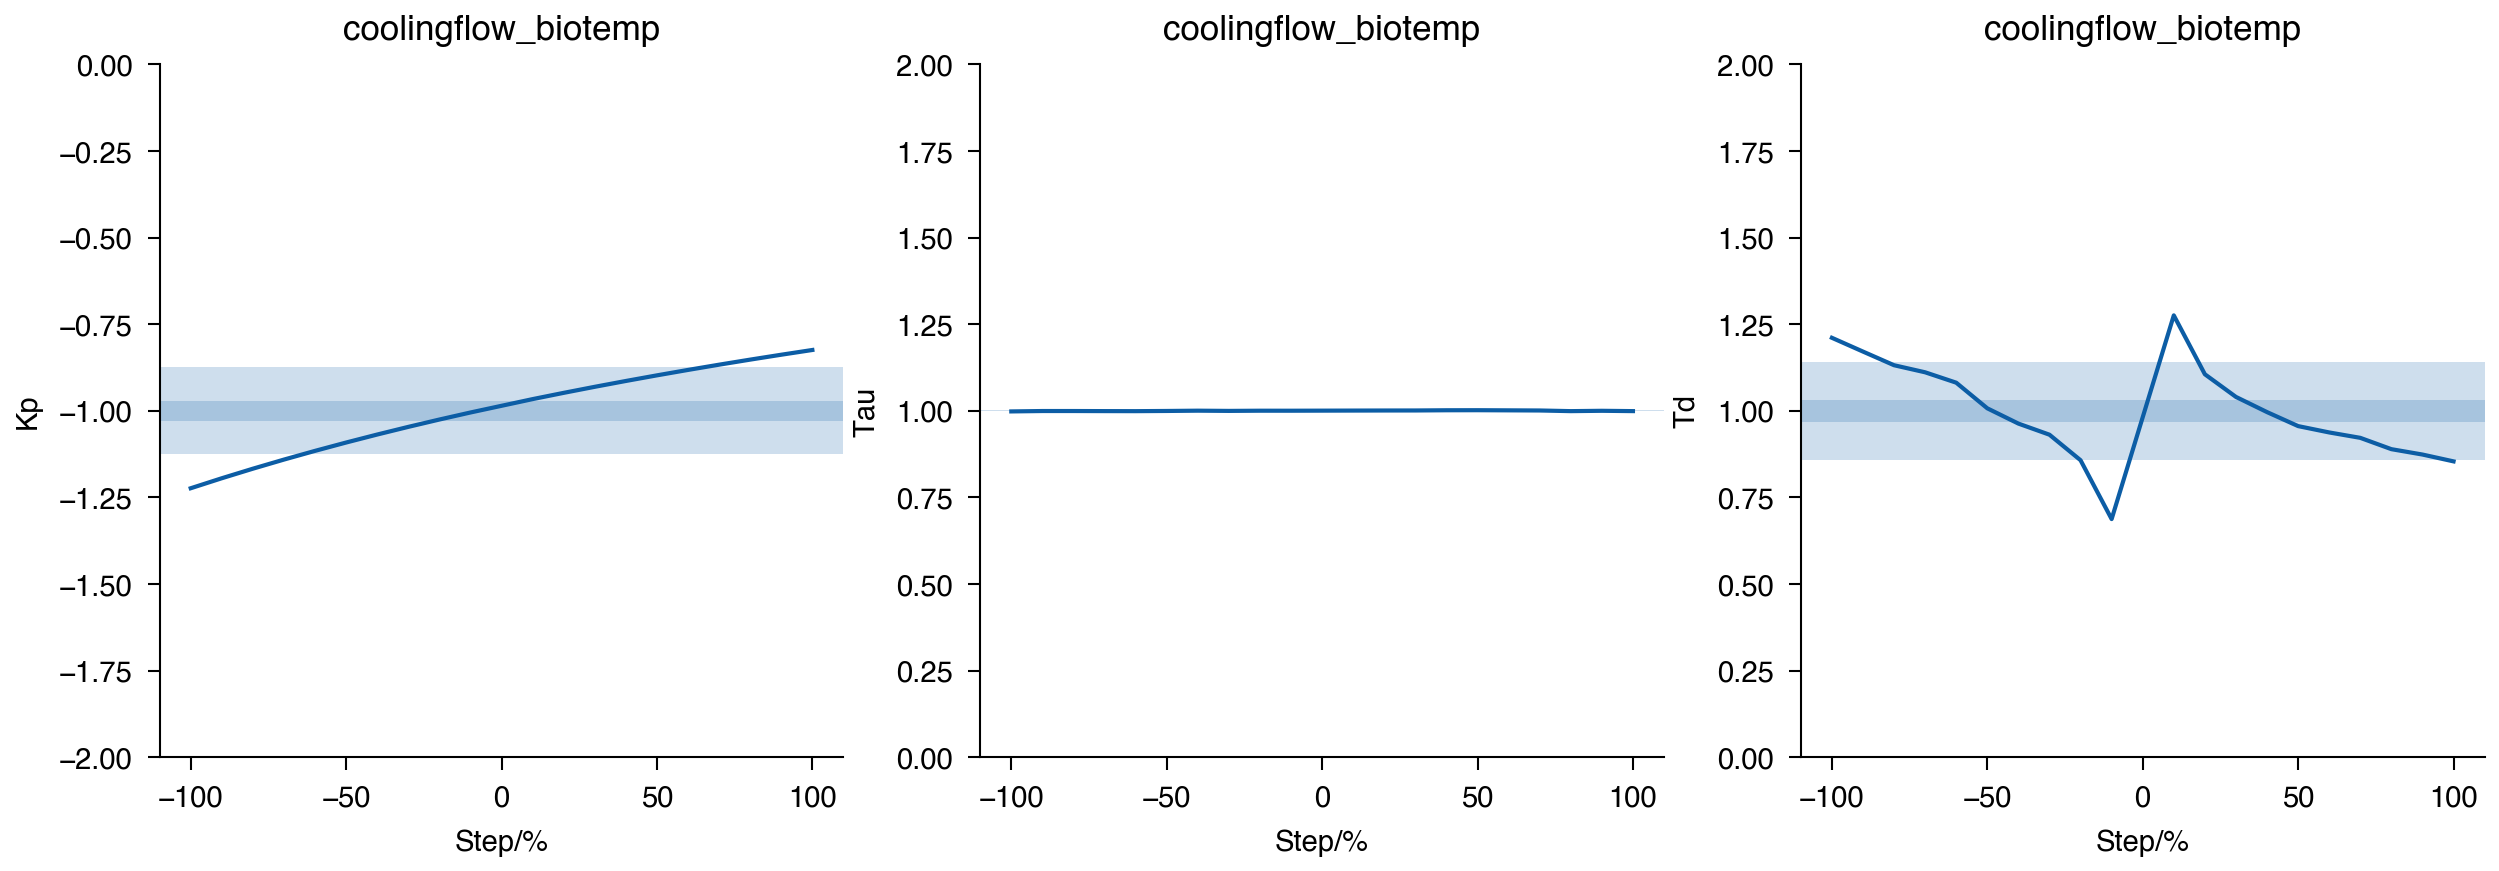

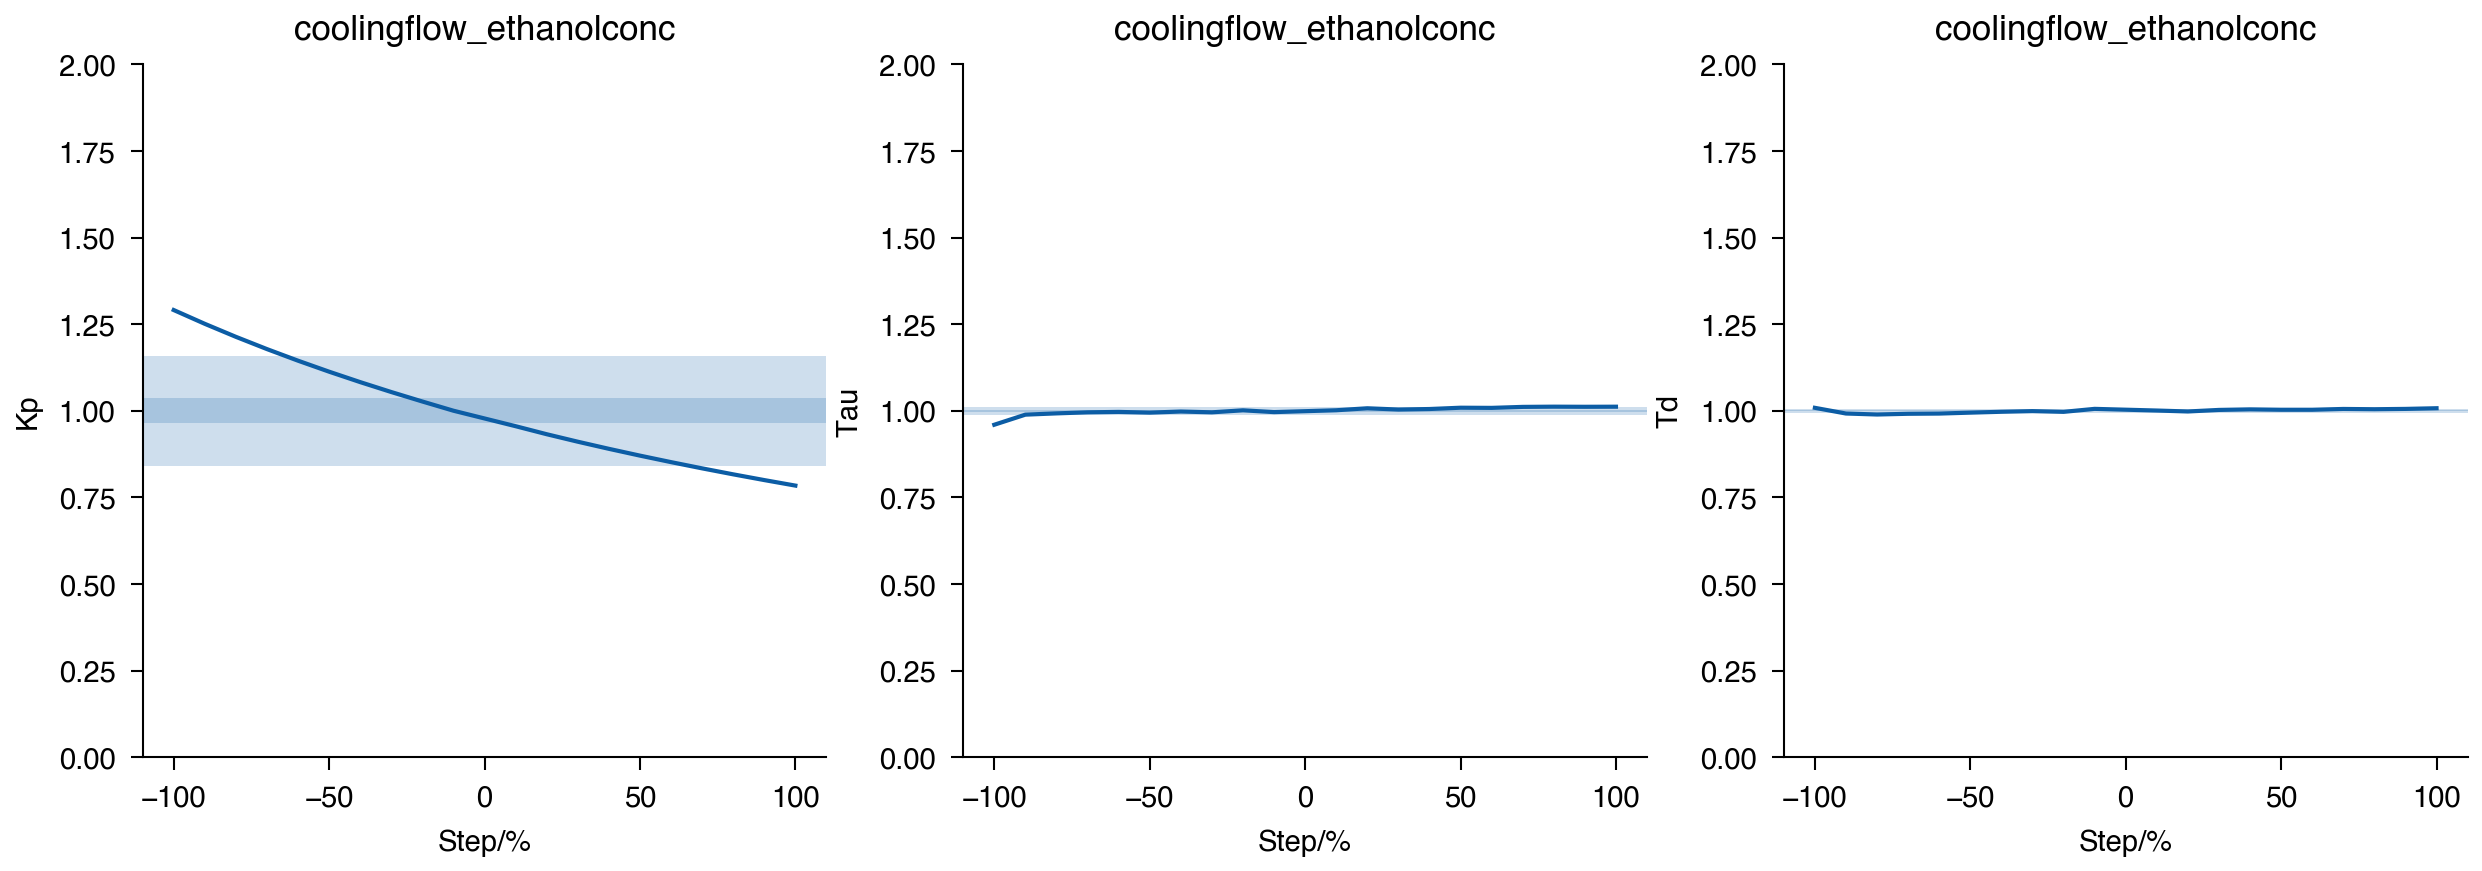

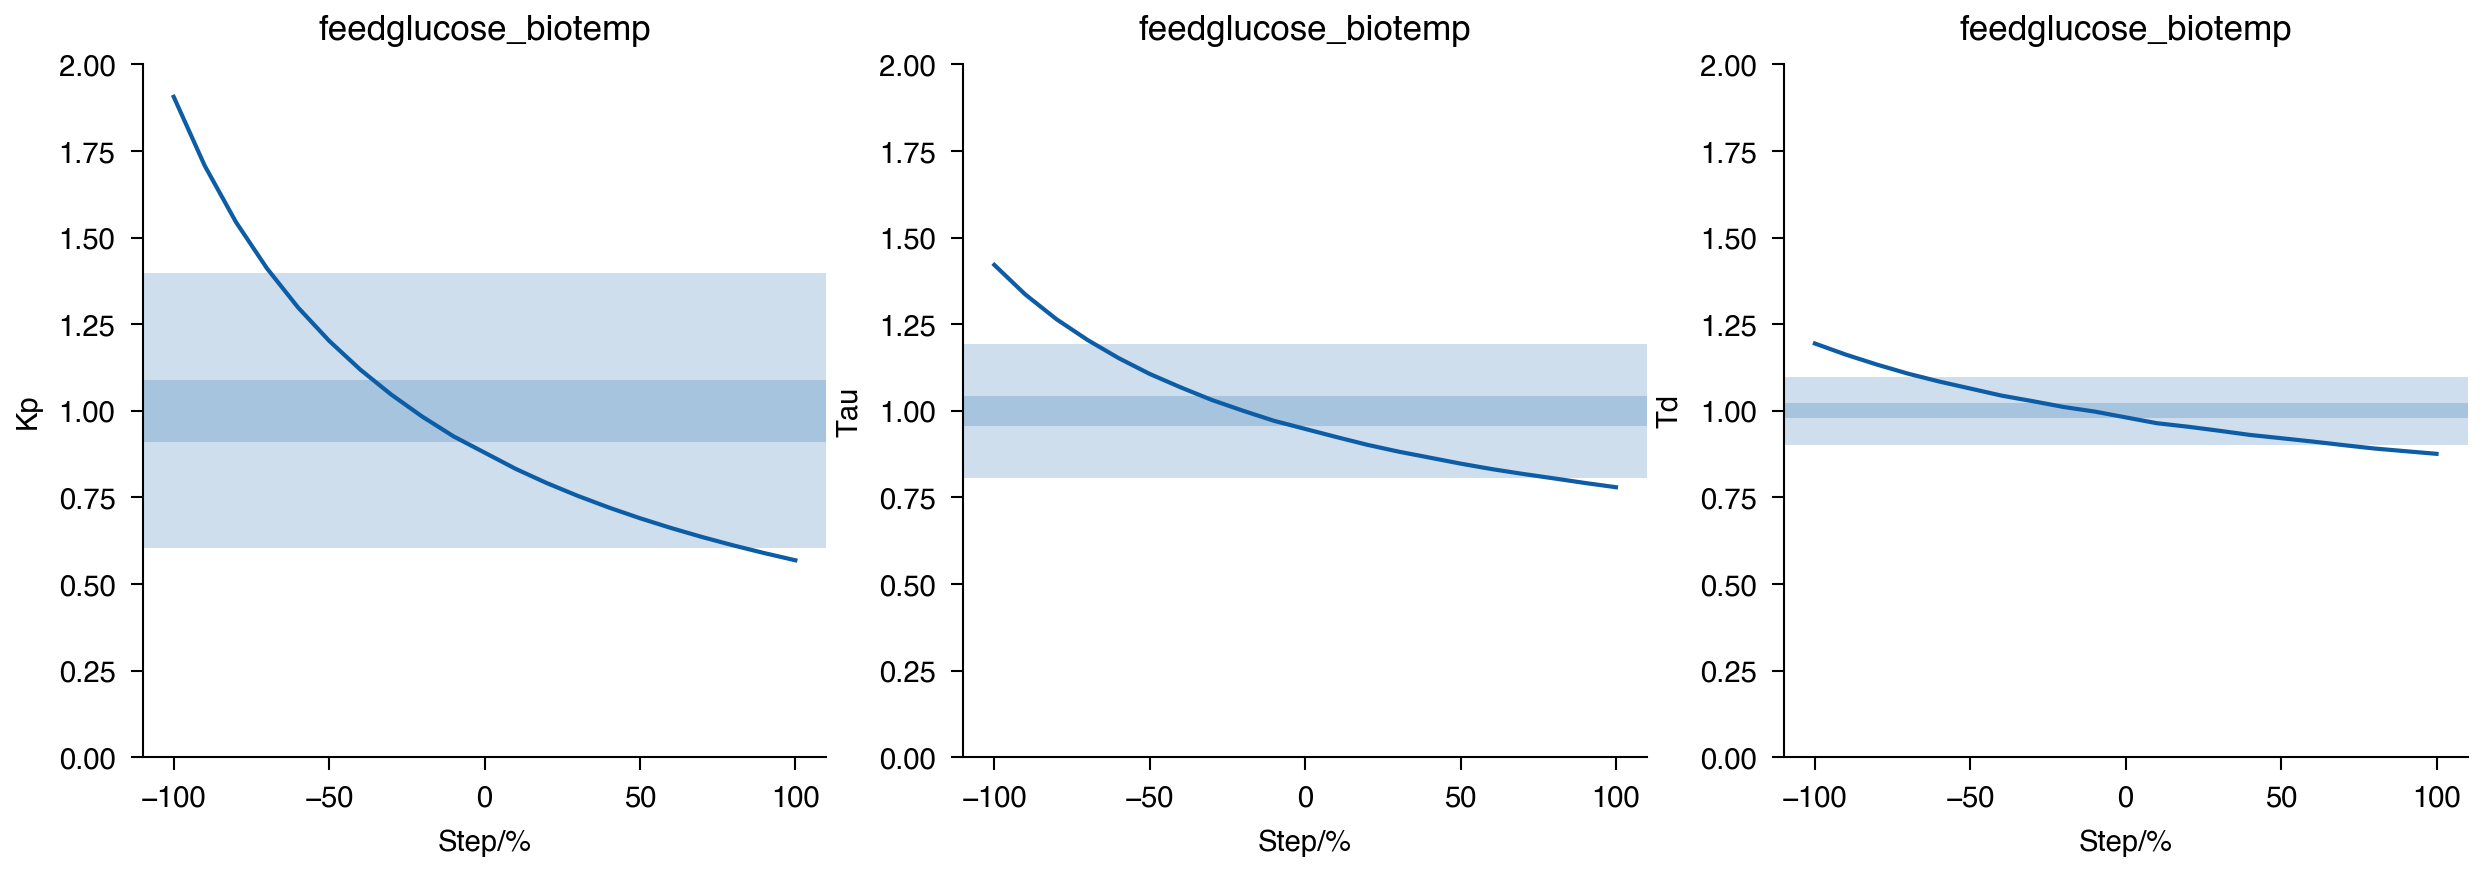

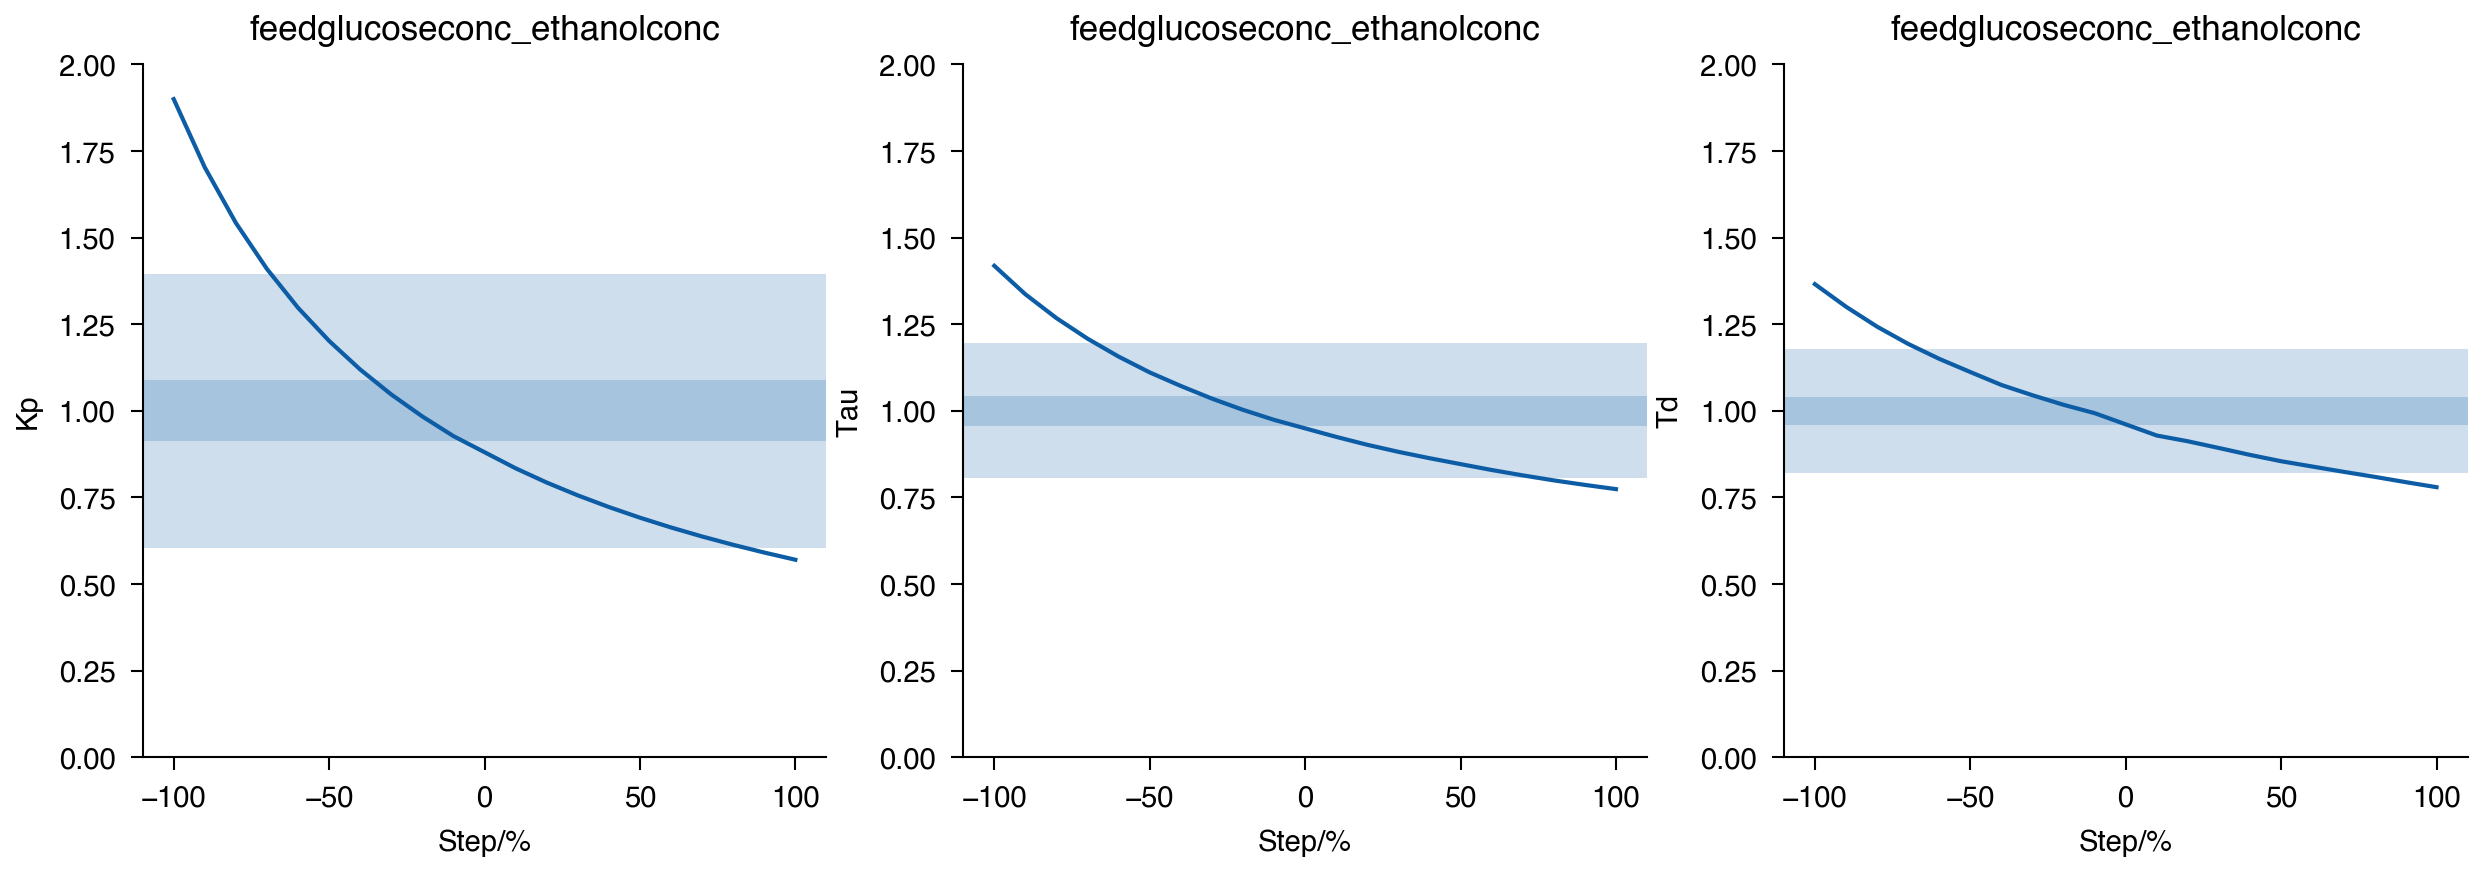

In [241]:
summary(coolingflow_biotemp, "coolingflow_biotemp", True)
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc", True)
summary(feedglucose_biotemp, "feedglucose_biotemp", True)
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc", True)


Step     0.000e+00 ± 1.918e+00
Kp      -7.199e-03 ± 1.234e-04
Tau      6.391e+00 ± 9.367e-04
Td       1.954e-03 ± 6.551e-05
dtype: object

Step    0.000e+00 ± 1.918e+00
Kp      4.013e-03 ± 8.605e-05
Tau     1.775e+01 ± 1.902e-02
Td      8.131e+00 ± 7.514e-03
dtype: object

Step    0.000e+00 ± 1.918e+00
Kp      5.293e-04 ± 1.548e-05
Tau     1.849e+01 ± 2.614e-01
Td      5.886e+00 ± 4.532e-02
dtype: object

Step    0.000e+00 ± 1.918e+00
Kp      3.562e-03 ± 1.037e-04
Tau     2.693e+01 ± 3.898e-01
Td      3.177e+00 ± 4.491e-02
dtype: object

(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Kp'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Tau'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step/%', ylabel='Td'>],
       dtype=object))

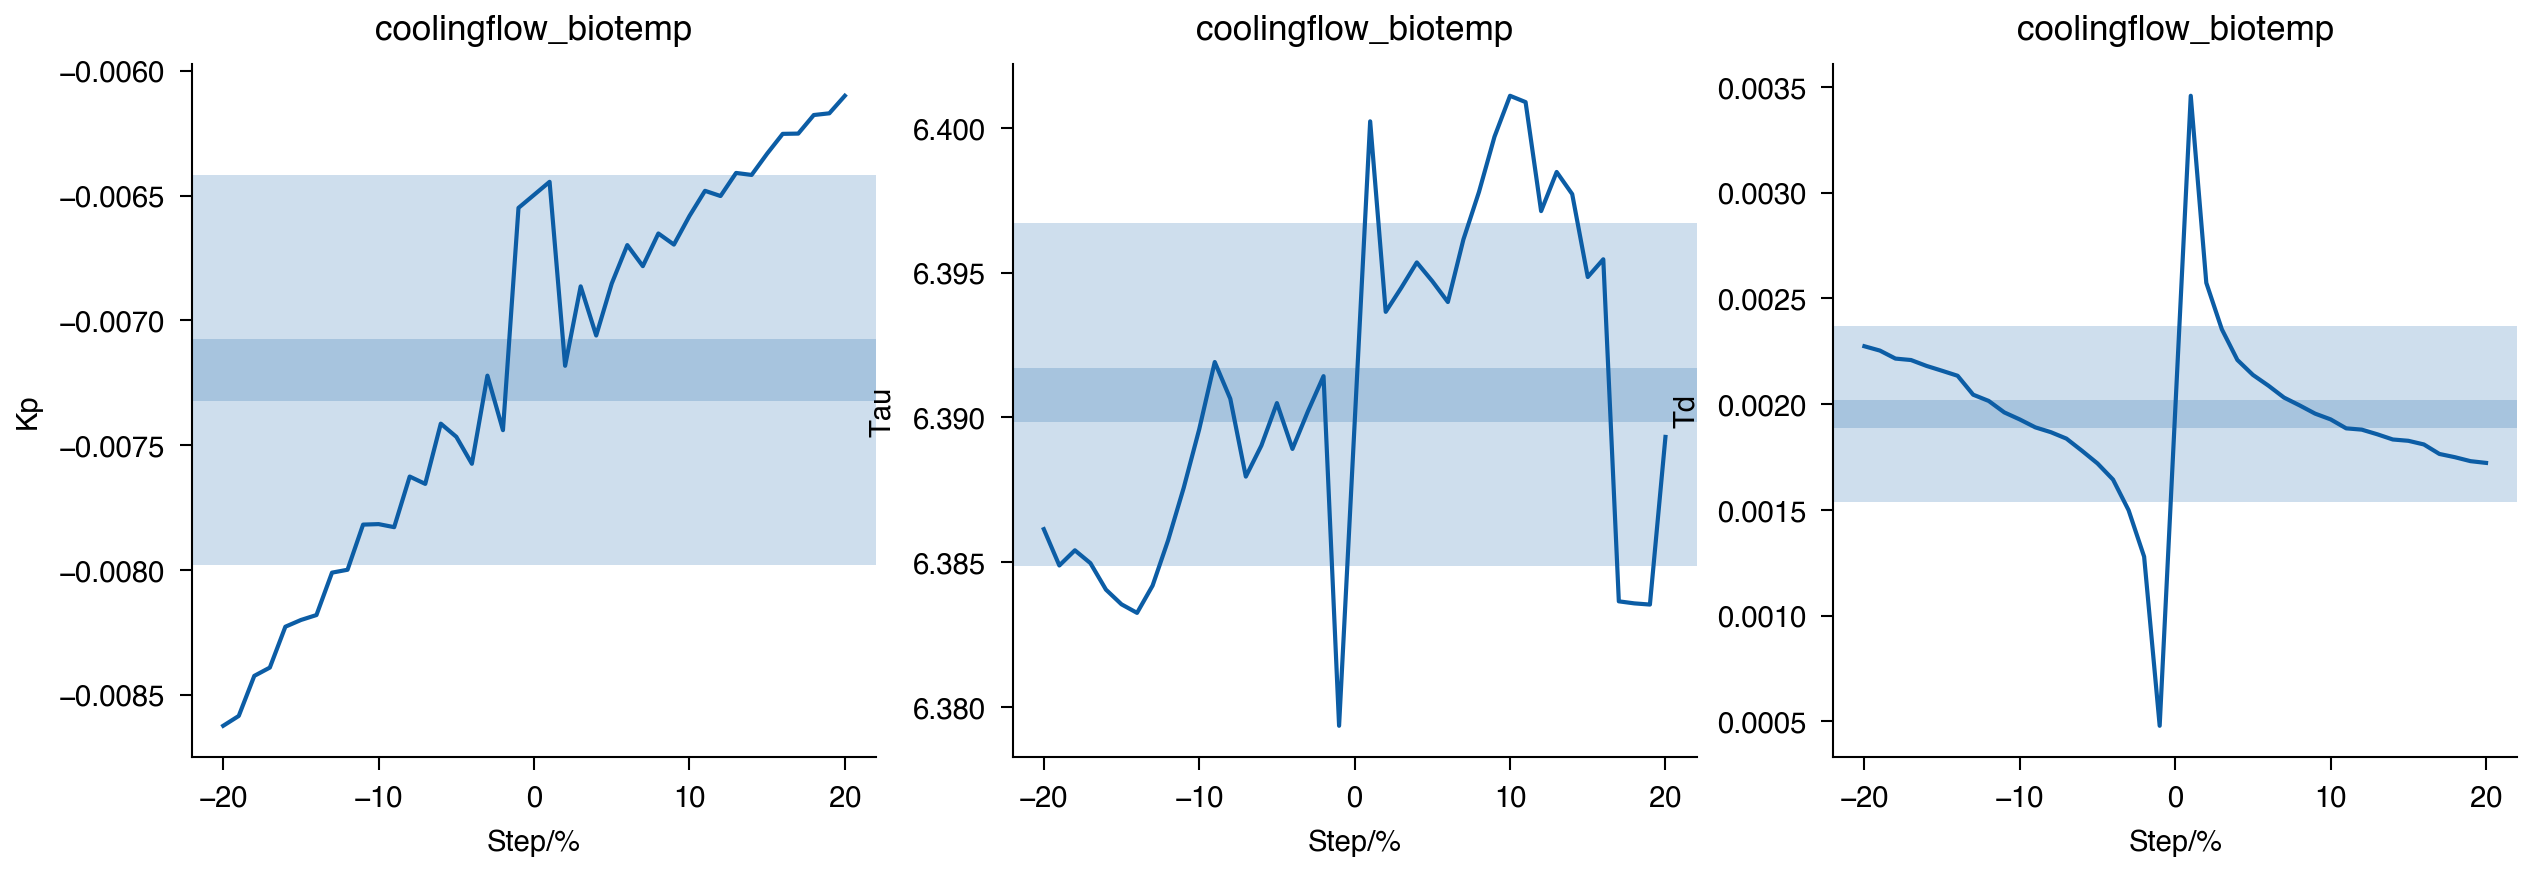

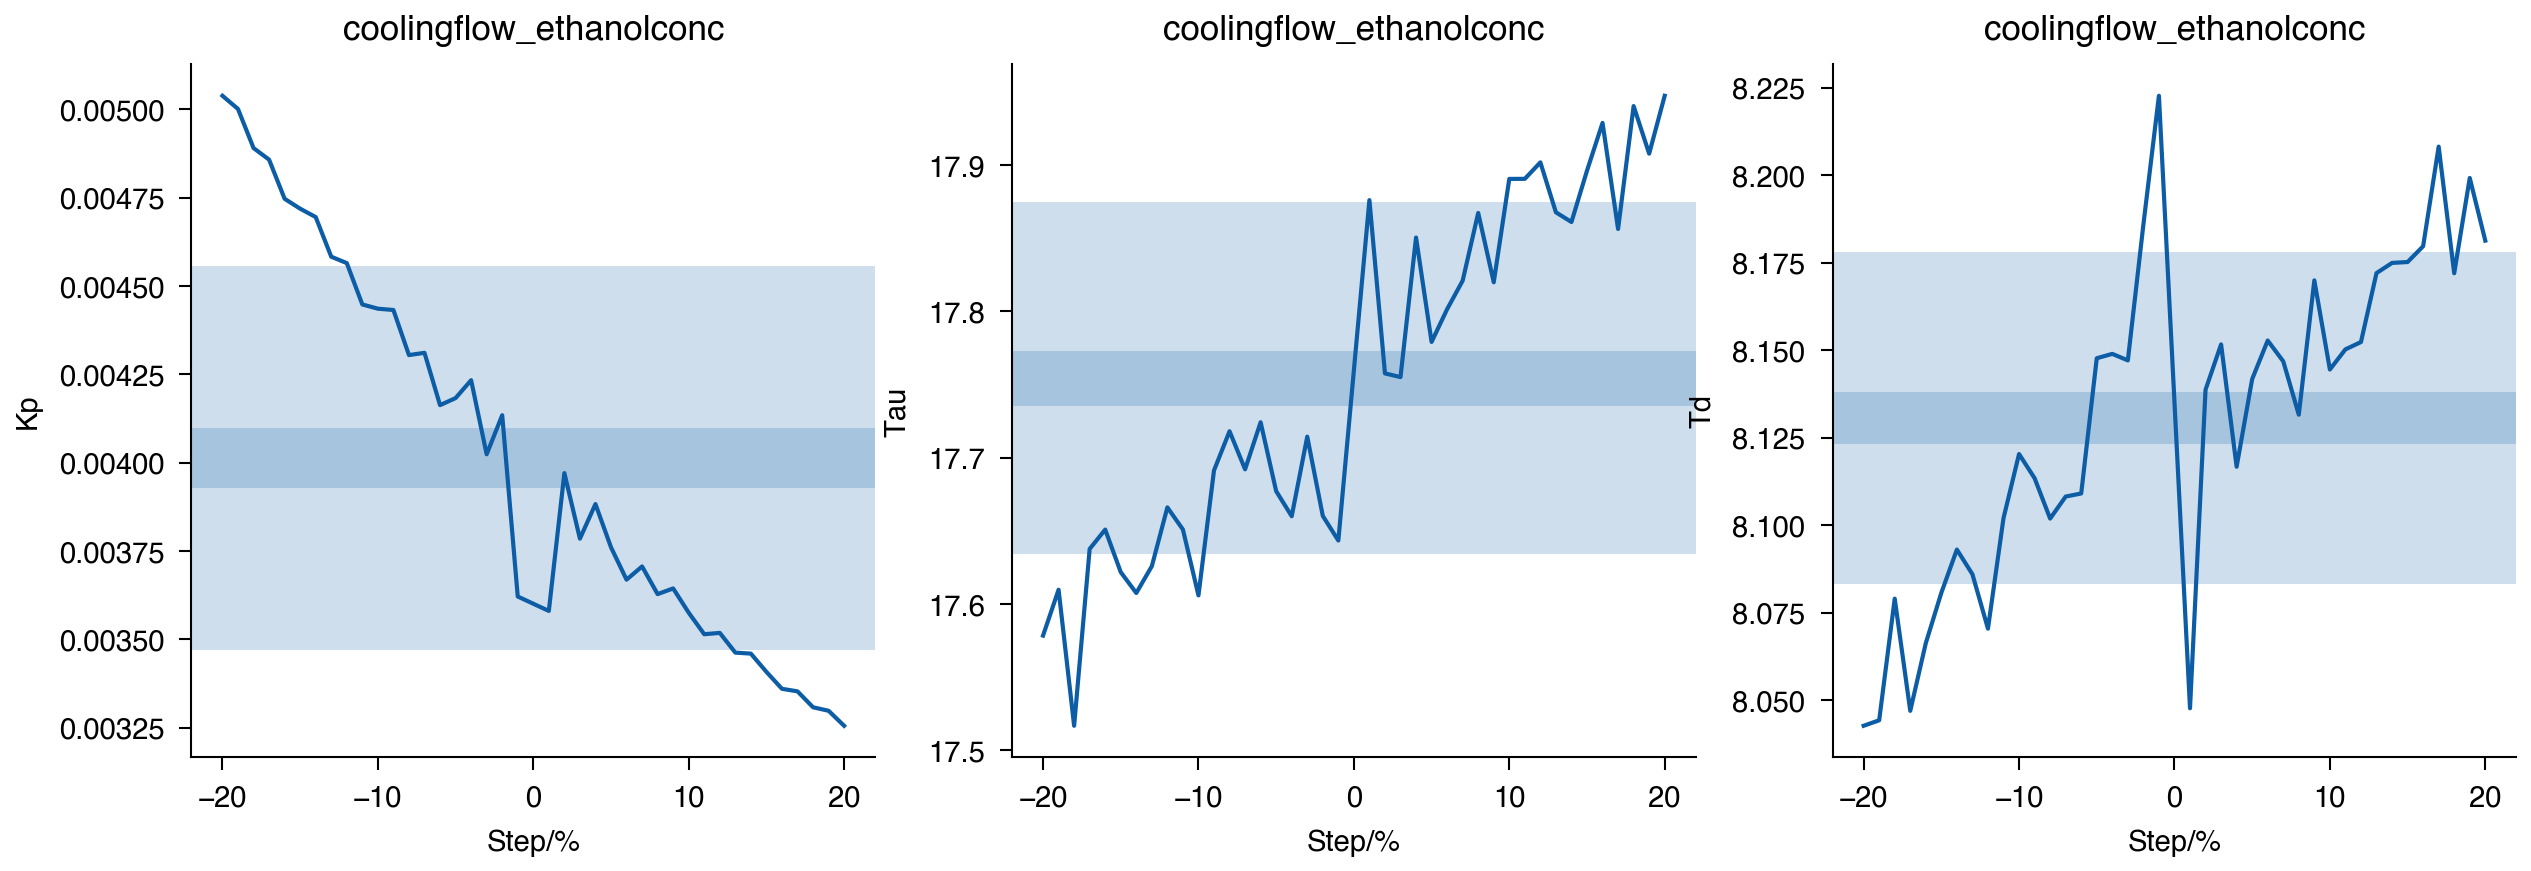

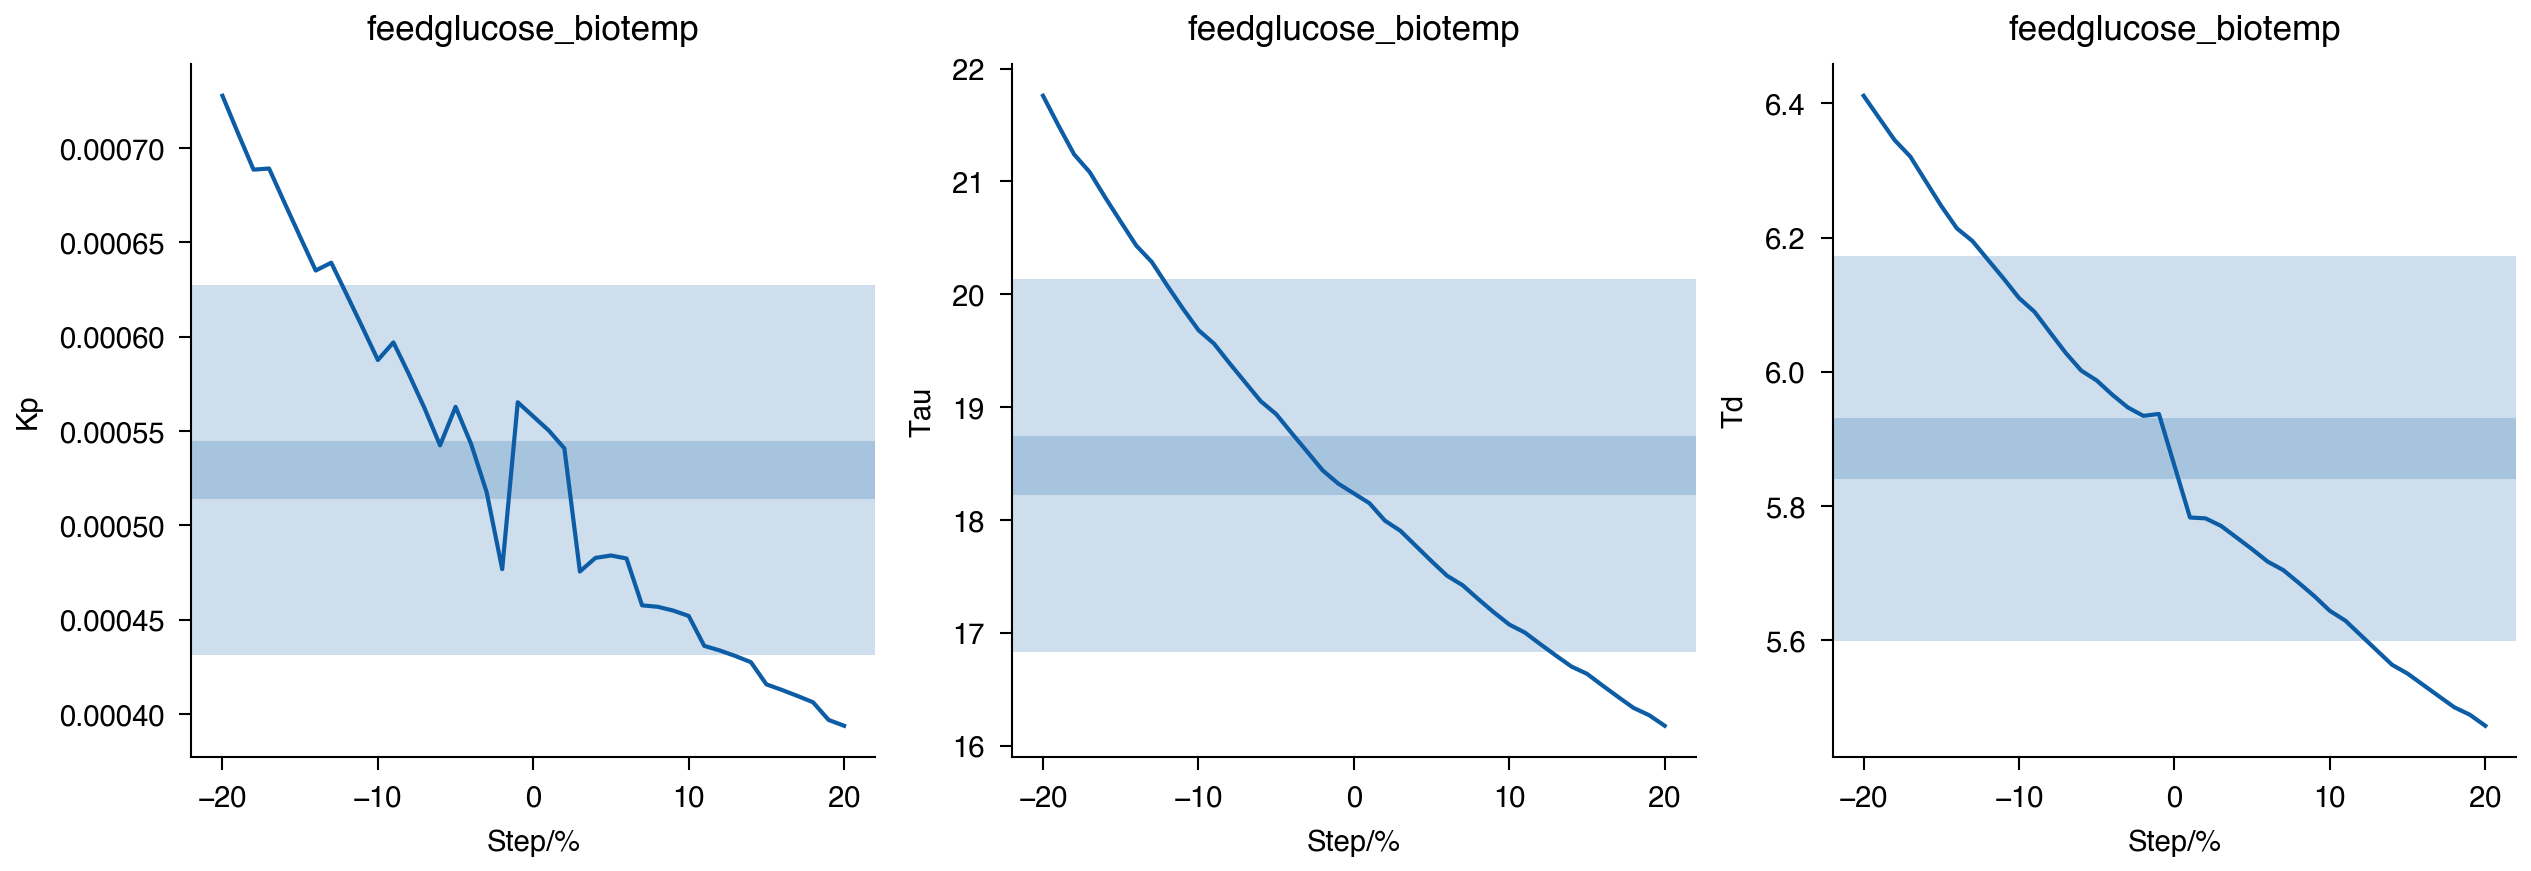

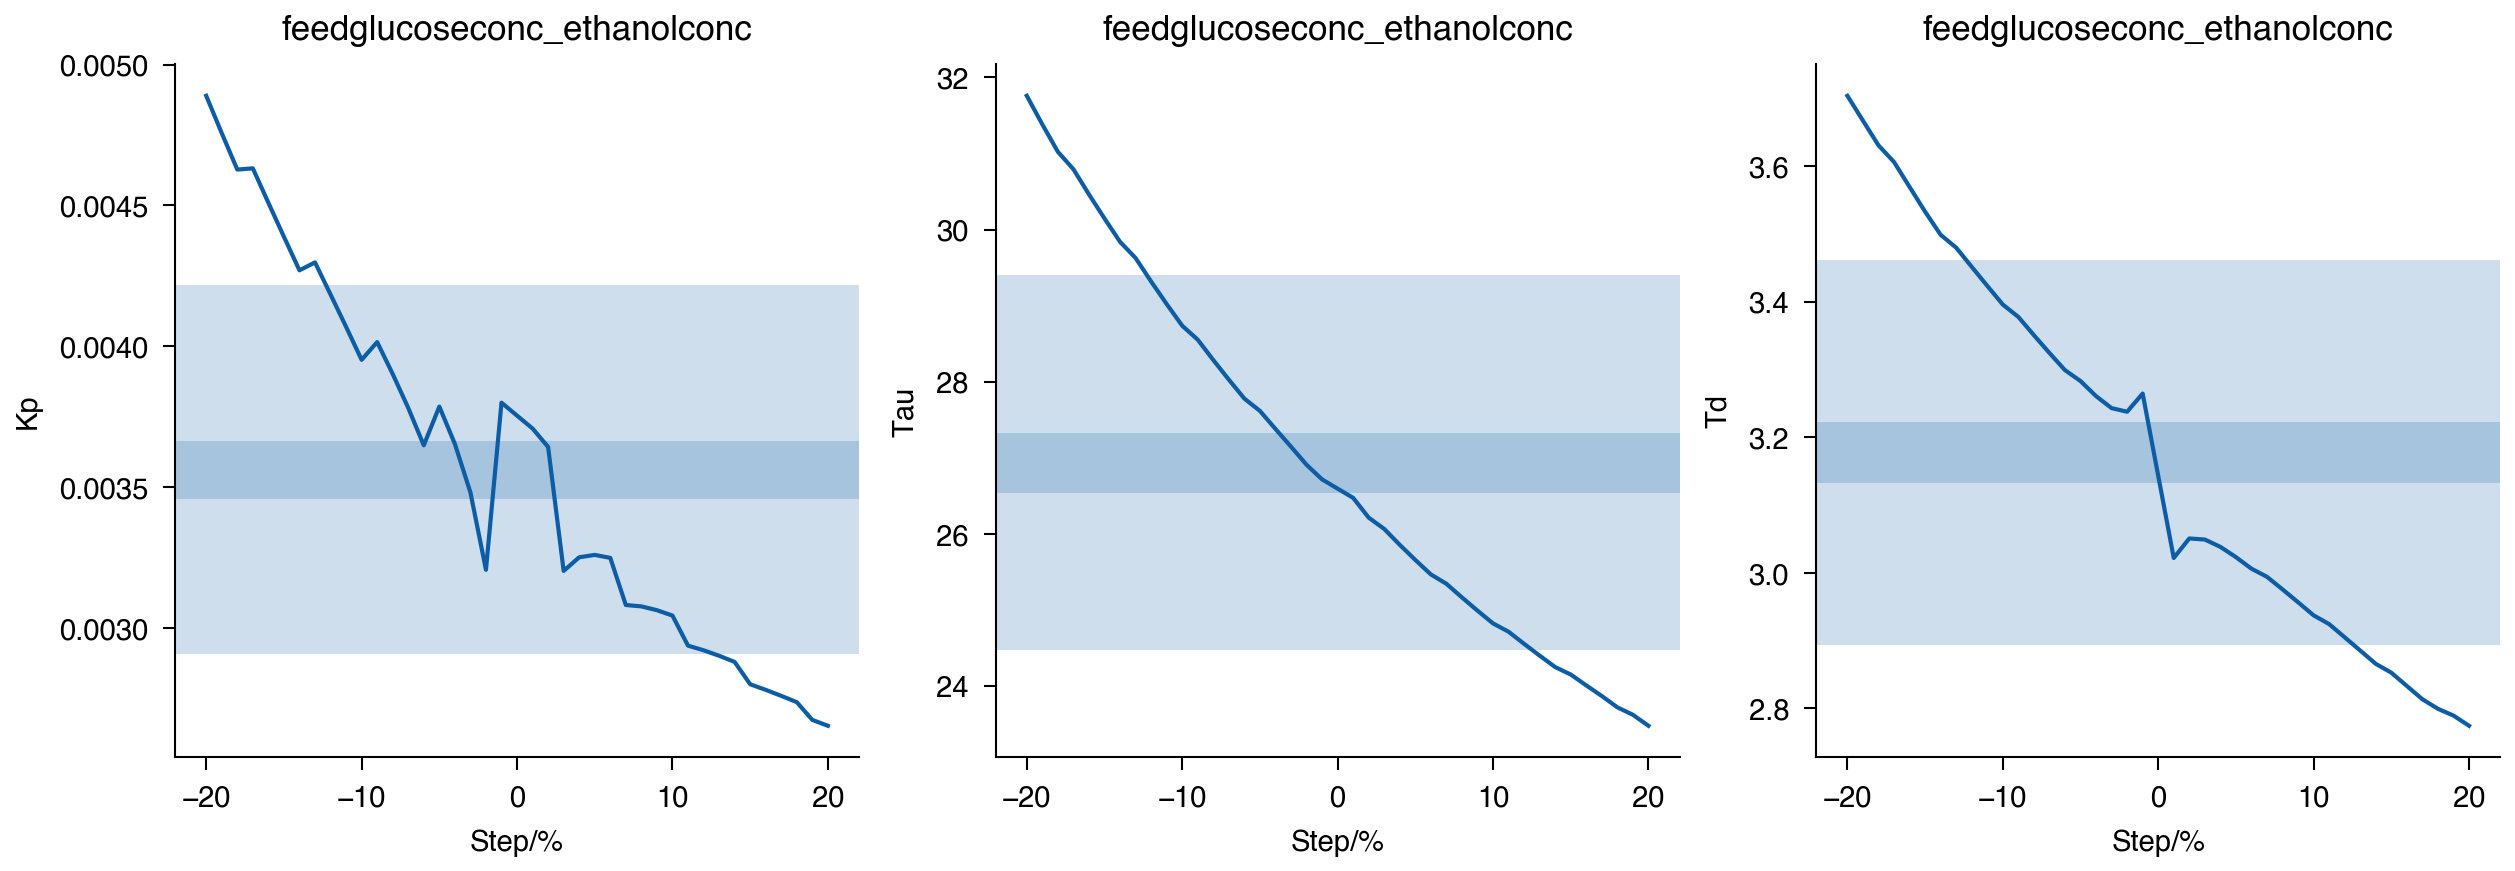

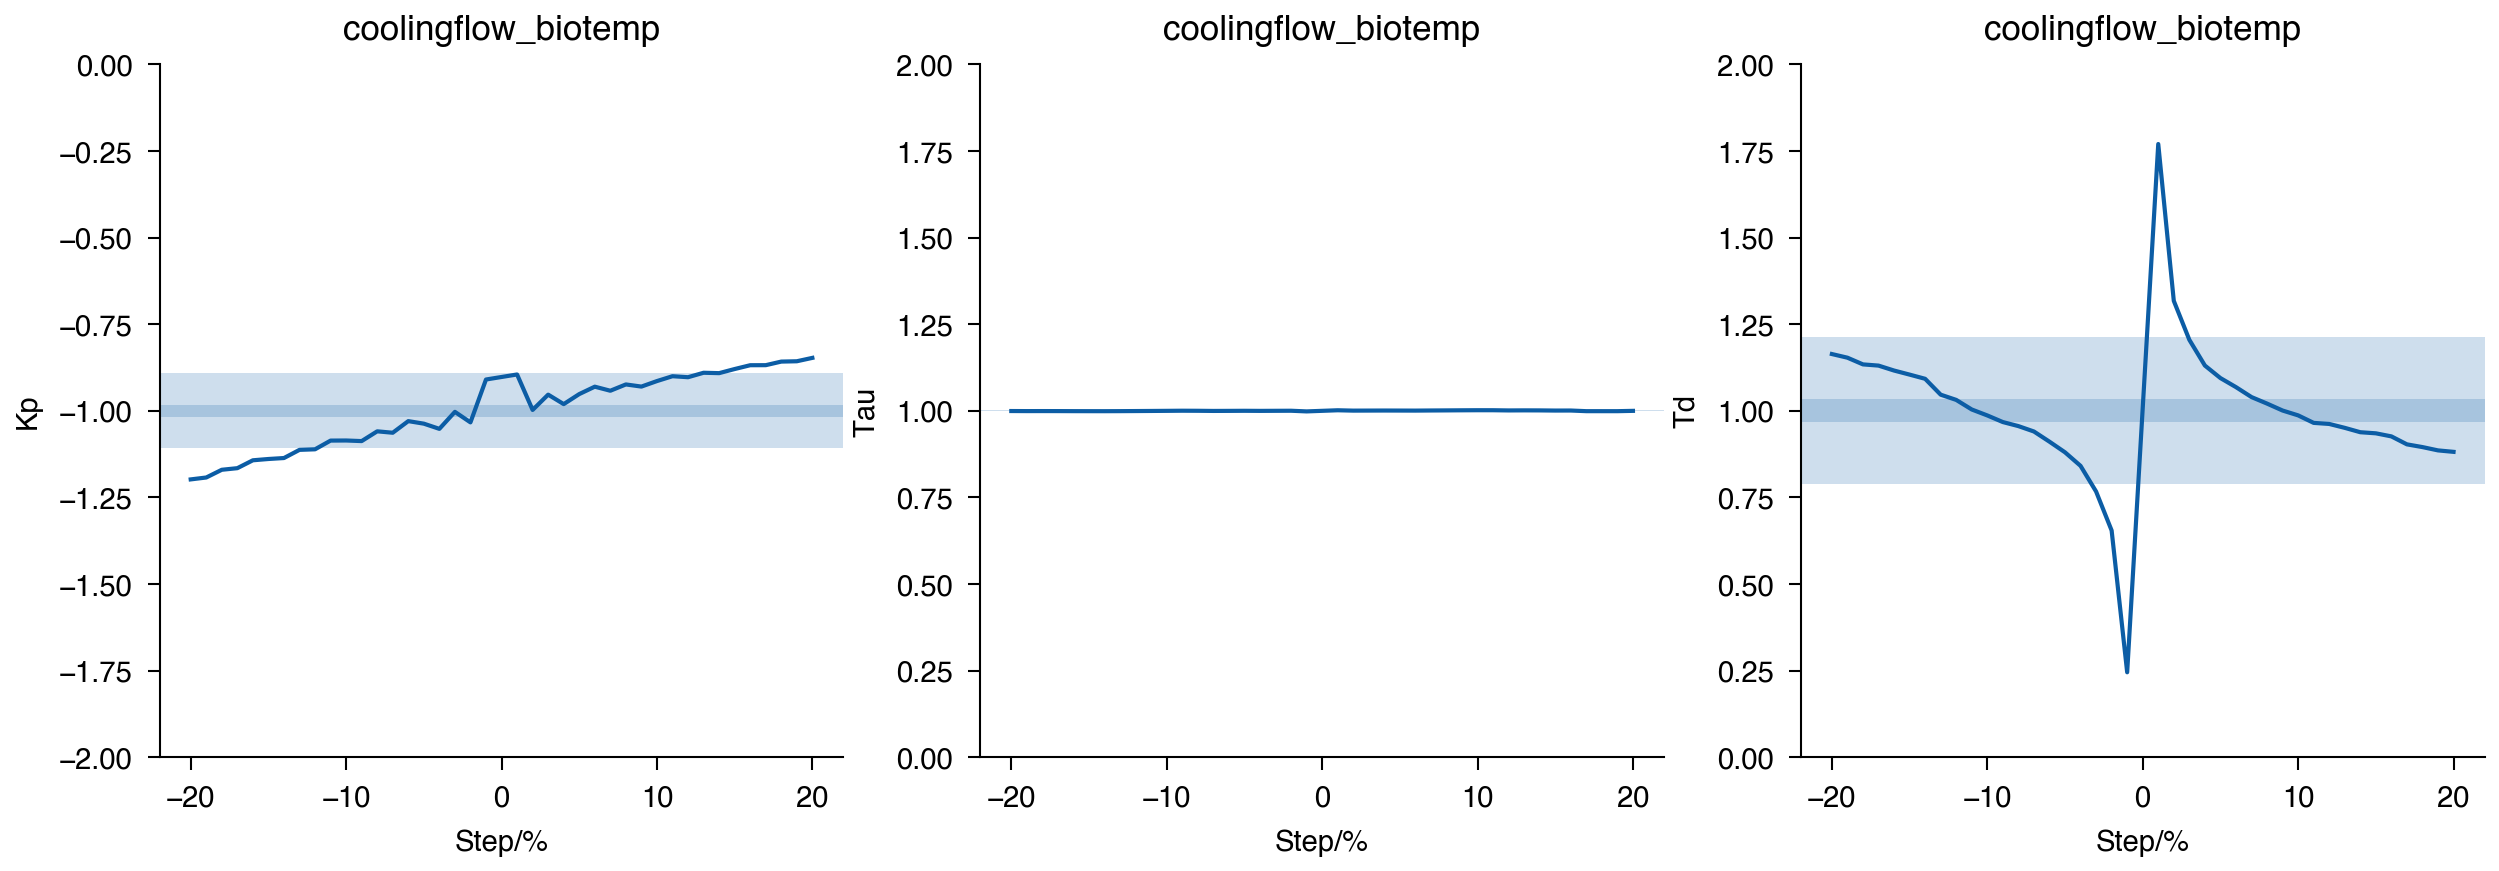

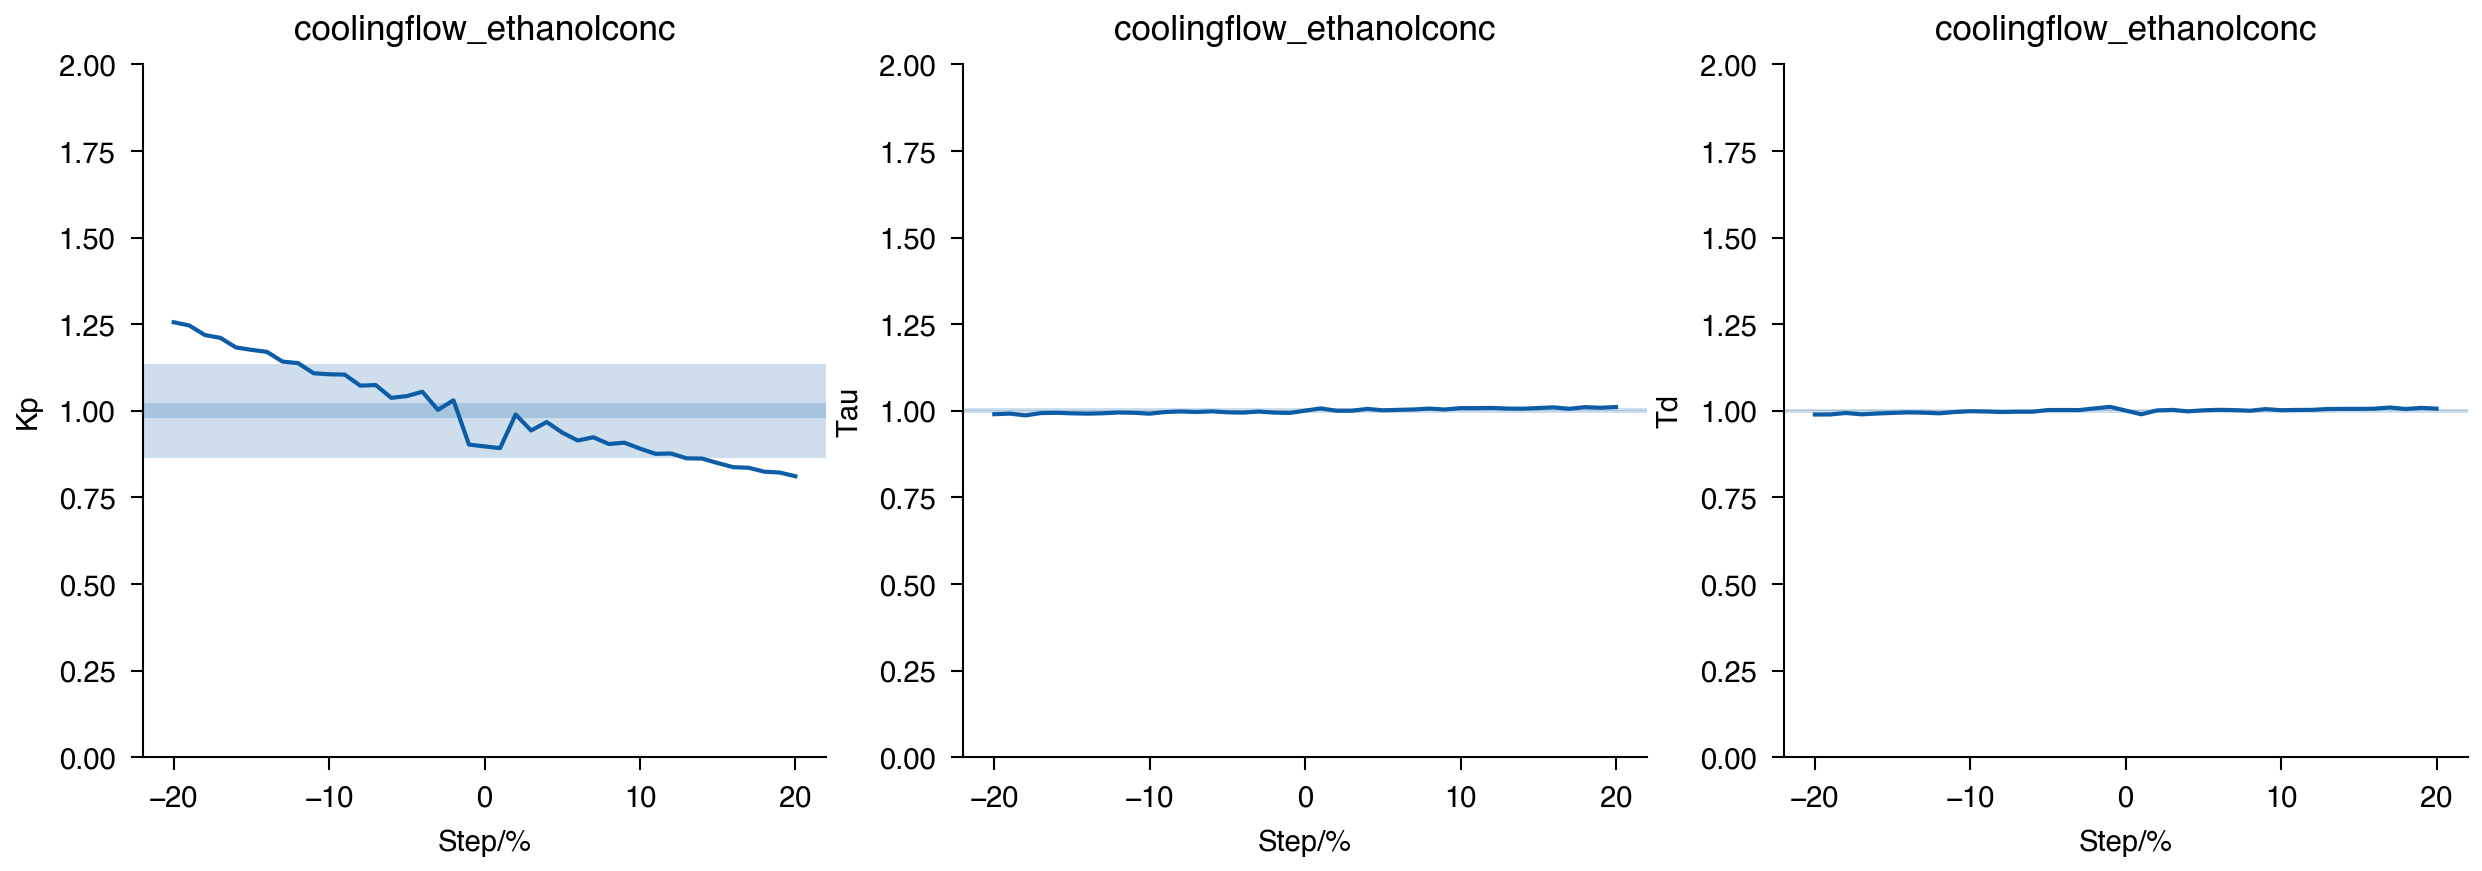

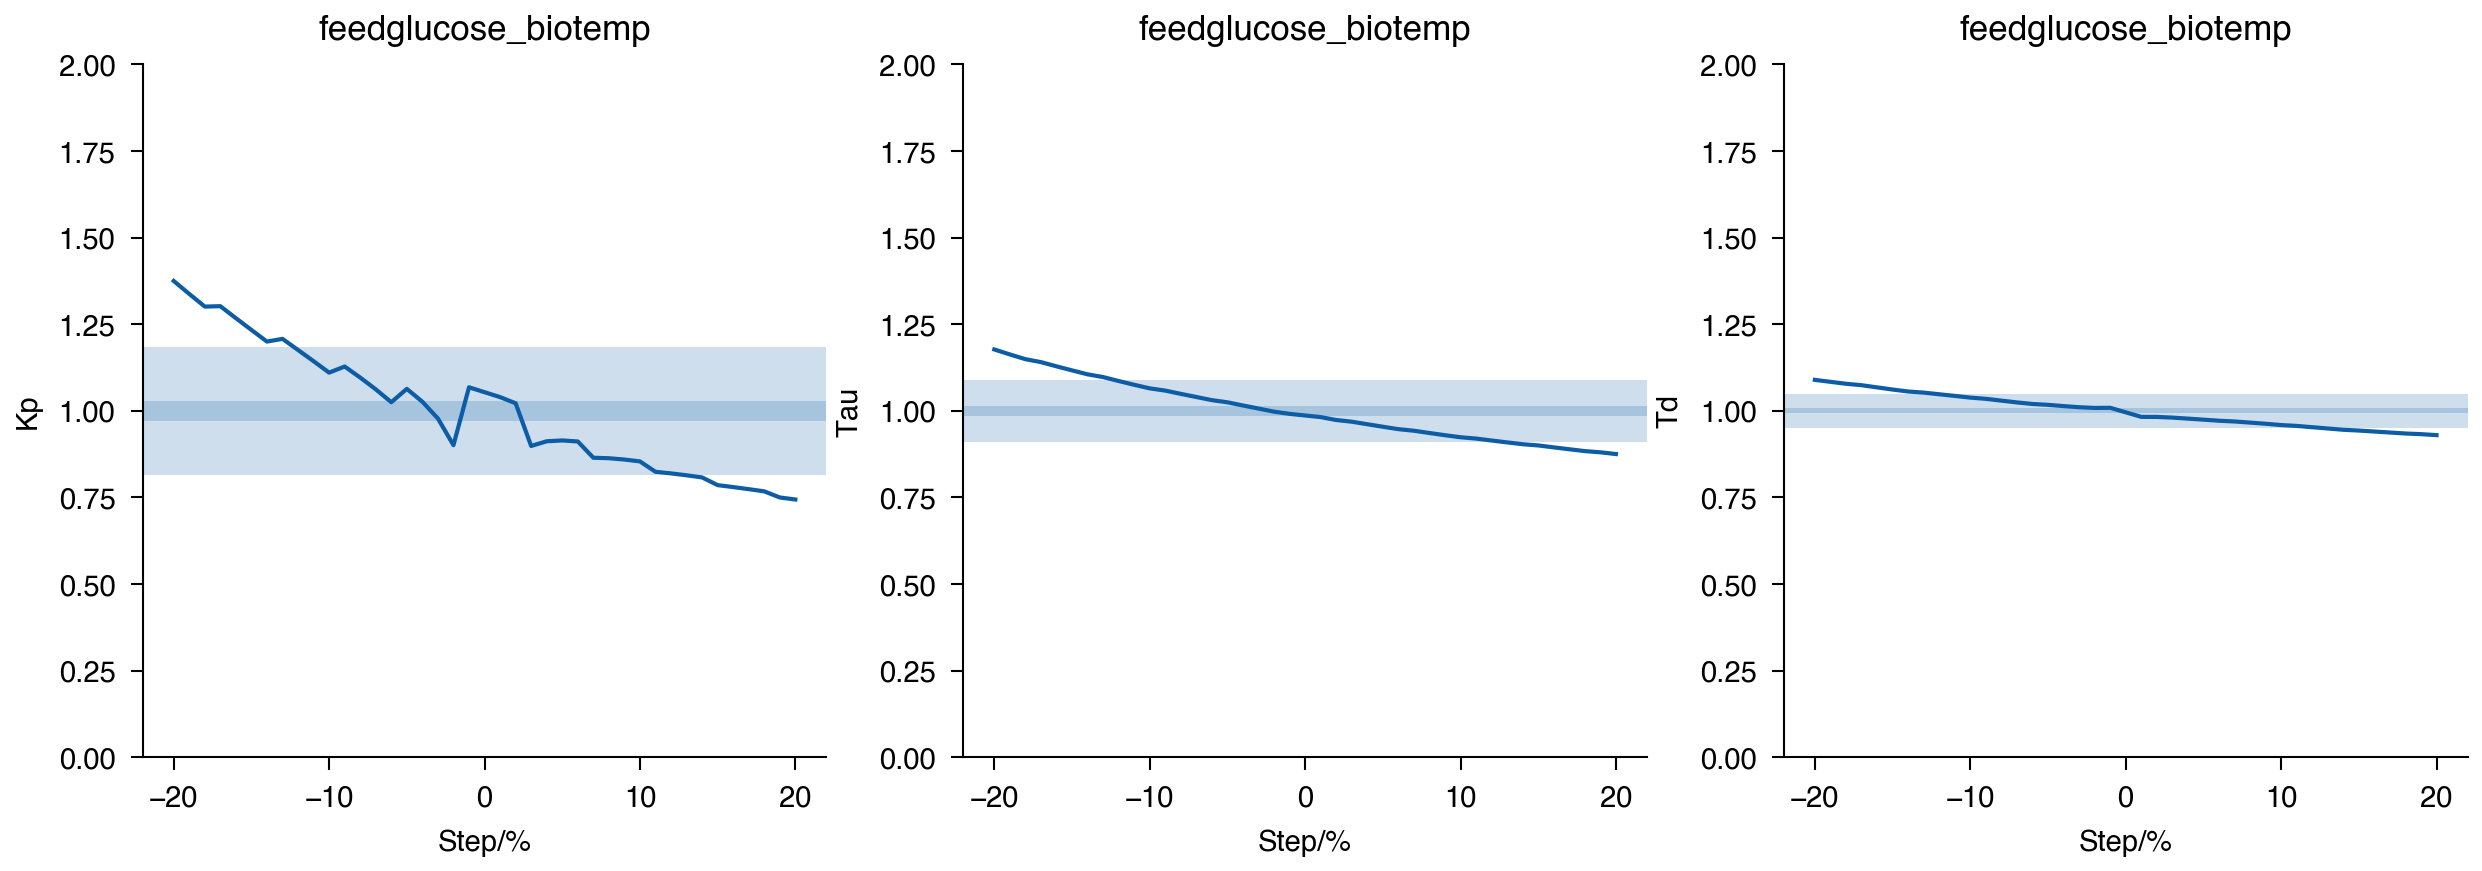

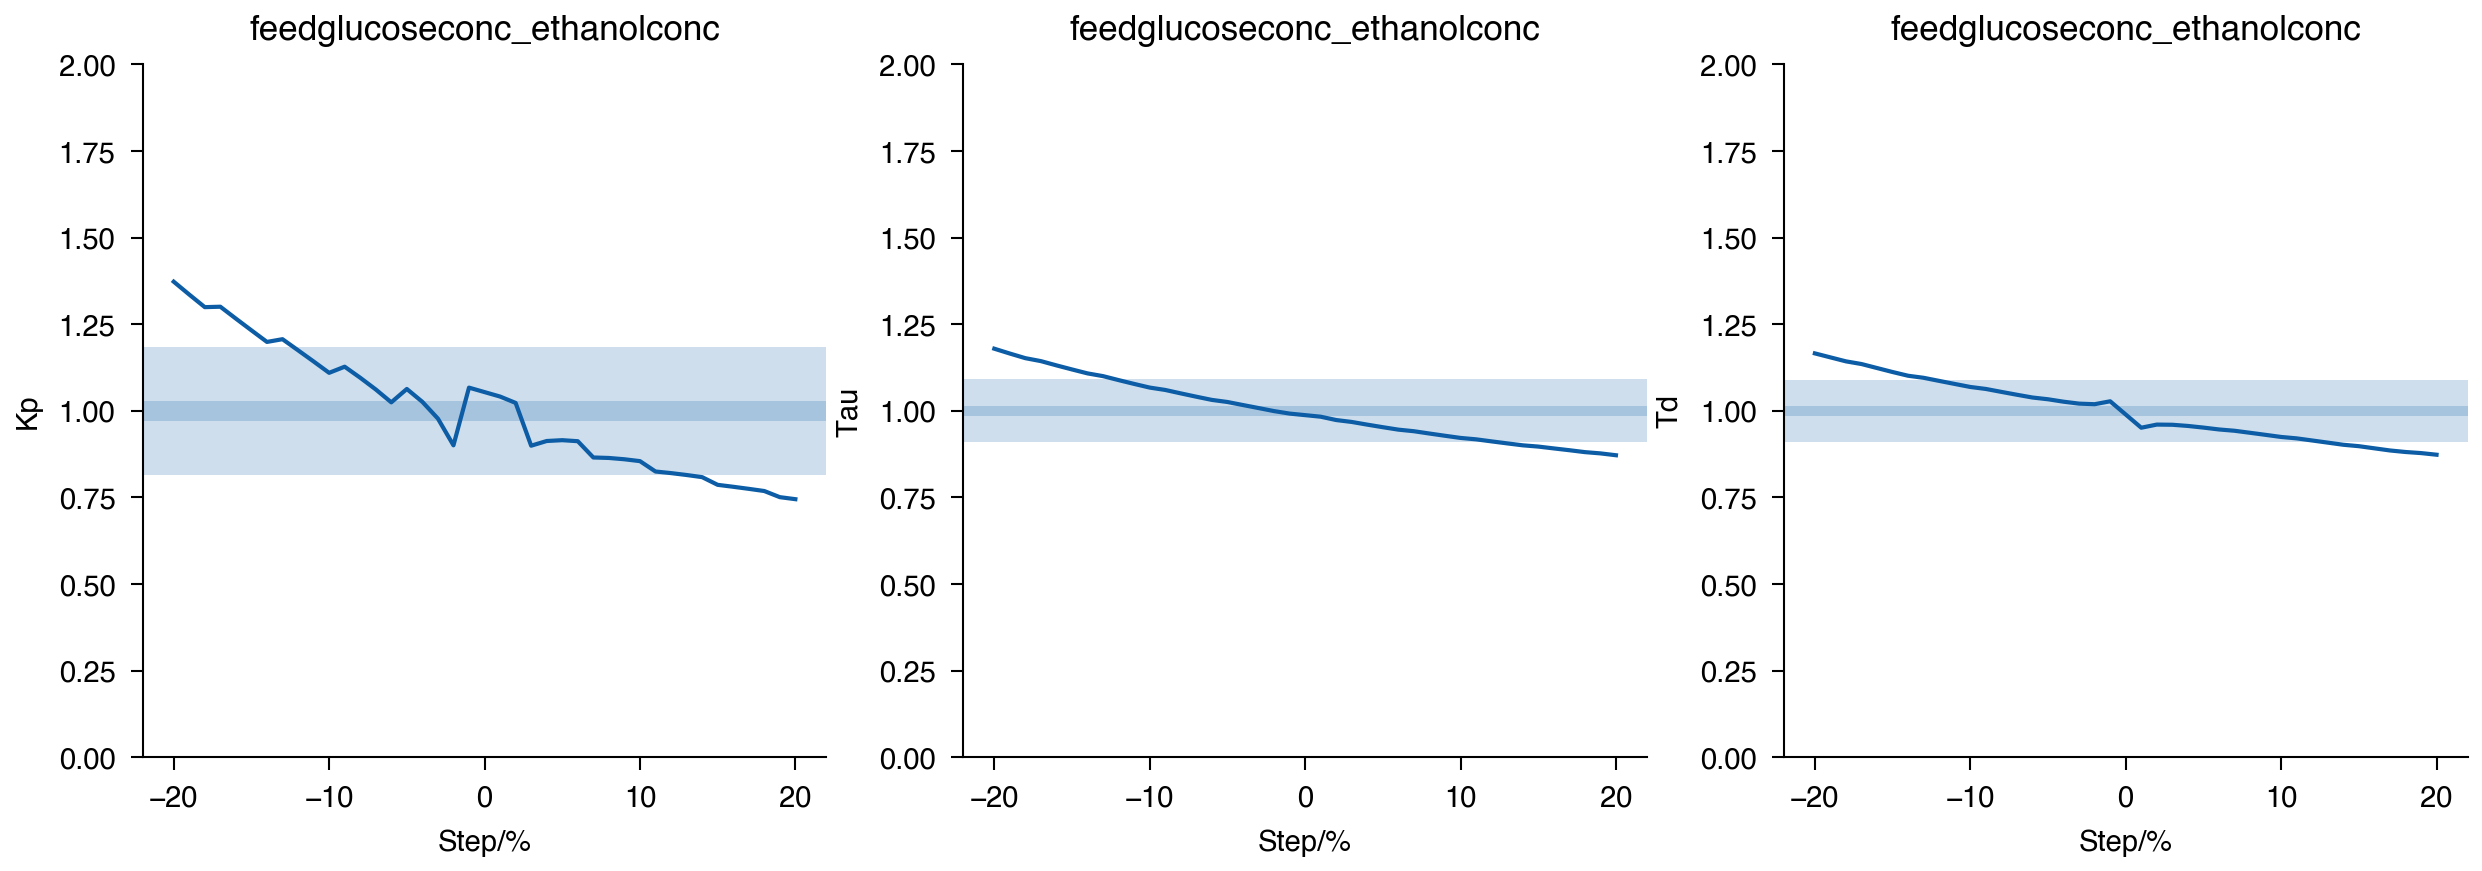

In [242]:
coolingflow_biotemp = pd.read_excel("20230210_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("20230210_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("20230210_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("20230210_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
summary(coolingflow_biotemp, "coolingflow_biotemp")
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc")
summary(feedglucose_biotemp, "feedglucose_biotemp")
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc")
summary(coolingflow_biotemp, "coolingflow_biotemp", True)
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc", True)
summary(feedglucose_biotemp, "feedglucose_biotemp", True)
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc", True)

